# Milestone 2 - Hypothesis Simulation 

## Author - Trupti Gandhi

### Table of Contents
- Examine data by visualizing data
- Standard confidence intervals for normal distribution
- Bootstrapped confidence intervals
- Bayesian estimates


Use the automotive data set to perform the following:
Identify a likely distribution for price and several other features.
Compute basic summary statistics by both classical, bootstrap and Bayesian methods
Compute confidence intervals for the above summary statistics by classical, bootstrap and  Bayesian methods
Correctly use hypothesis tests to determine if the differences in pairs and multiple populations are significant:
- Classical tests
- Tukey’s Honest Significant Differences (HSD)
- Bootstrap methods
- Bayesian model

In [206]:
import plotly.plotly as py
import numpy as np
import matplotlib.pyplot as plt
from plotly.graph_objs import *
%matplotlib inline
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid.axislines import Subplot
import seaborn as sns

In [207]:
Automobile = pd.read_csv(r"C:\Users\Gandhi\Desktop\Method_For_Data_Analysys\CH5\Automobile price data _Raw_.csv", usecols=range(0,26))
Automobile.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


First Few steps are **examining the data** and plots are to ** Visualization ** of data. 

In [208]:
Automobile.shape

(205, 26)

There are total ** 205 rows and 26 features** in this dataset.

#### Checking and removing the missing values from data set

In [209]:
Automobile_df= Automobile.replace('[?]', np.NaN, regex = True)
print(Automobile_df.isnull().sum())

symboling             0
normalized-losses    41
make                  0
fuel-type             0
aspiration            0
num-of-doors          2
body-style            0
drive-wheels          0
engine-location       0
wheel-base            0
length                0
width                 0
height                0
curb-weight           0
engine-type           0
num-of-cylinders      0
engine-size           0
fuel-system           0
bore                  4
stroke                4
compression-ratio     0
horsepower            2
peak-rpm              2
city-mpg              0
highway-mpg           0
price                 4
dtype: int64


In [210]:
Automobile_df= Automobile_df.dropna()

In [211]:
Automobile_df= Automobile_df.reset_index(drop=True)

In [212]:
print(Automobile_df.dtypes)

symboling              int64
normalized-losses     object
make                  object
fuel-type             object
aspiration            object
num-of-doors          object
body-style            object
drive-wheels          object
engine-location       object
wheel-base           float64
length               float64
width                float64
height               float64
curb-weight            int64
engine-type           object
num-of-cylinders      object
engine-size            int64
fuel-system           object
bore                  object
stroke                object
compression-ratio    float64
horsepower            object
peak-rpm              object
city-mpg               int64
highway-mpg            int64
price                 object
dtype: object


Convert object to the float for few columns

In [213]:
  Automobile_df[['normalized-losses', 'bore', 'stroke',
       'horsepower', 'peak-rpm', 'price']] = Automobile_df[['normalized-losses', 'bore', 'stroke',
       'horsepower', 'peak-rpm', 'price']].astype(float)

In [214]:
print(Automobile_df.dtypes)

symboling              int64
normalized-losses    float64
make                  object
fuel-type             object
aspiration            object
num-of-doors          object
body-style            object
drive-wheels          object
engine-location       object
wheel-base           float64
length               float64
width                float64
height               float64
curb-weight            int64
engine-type           object
num-of-cylinders      object
engine-size            int64
fuel-system           object
bore                 float64
stroke               float64
compression-ratio    float64
horsepower           float64
peak-rpm             float64
city-mpg               int64
highway-mpg            int64
price                float64
dtype: object


Visualization is a key first step in the exploration of data sets. This is important to understand the data before applying the statistics on the data.

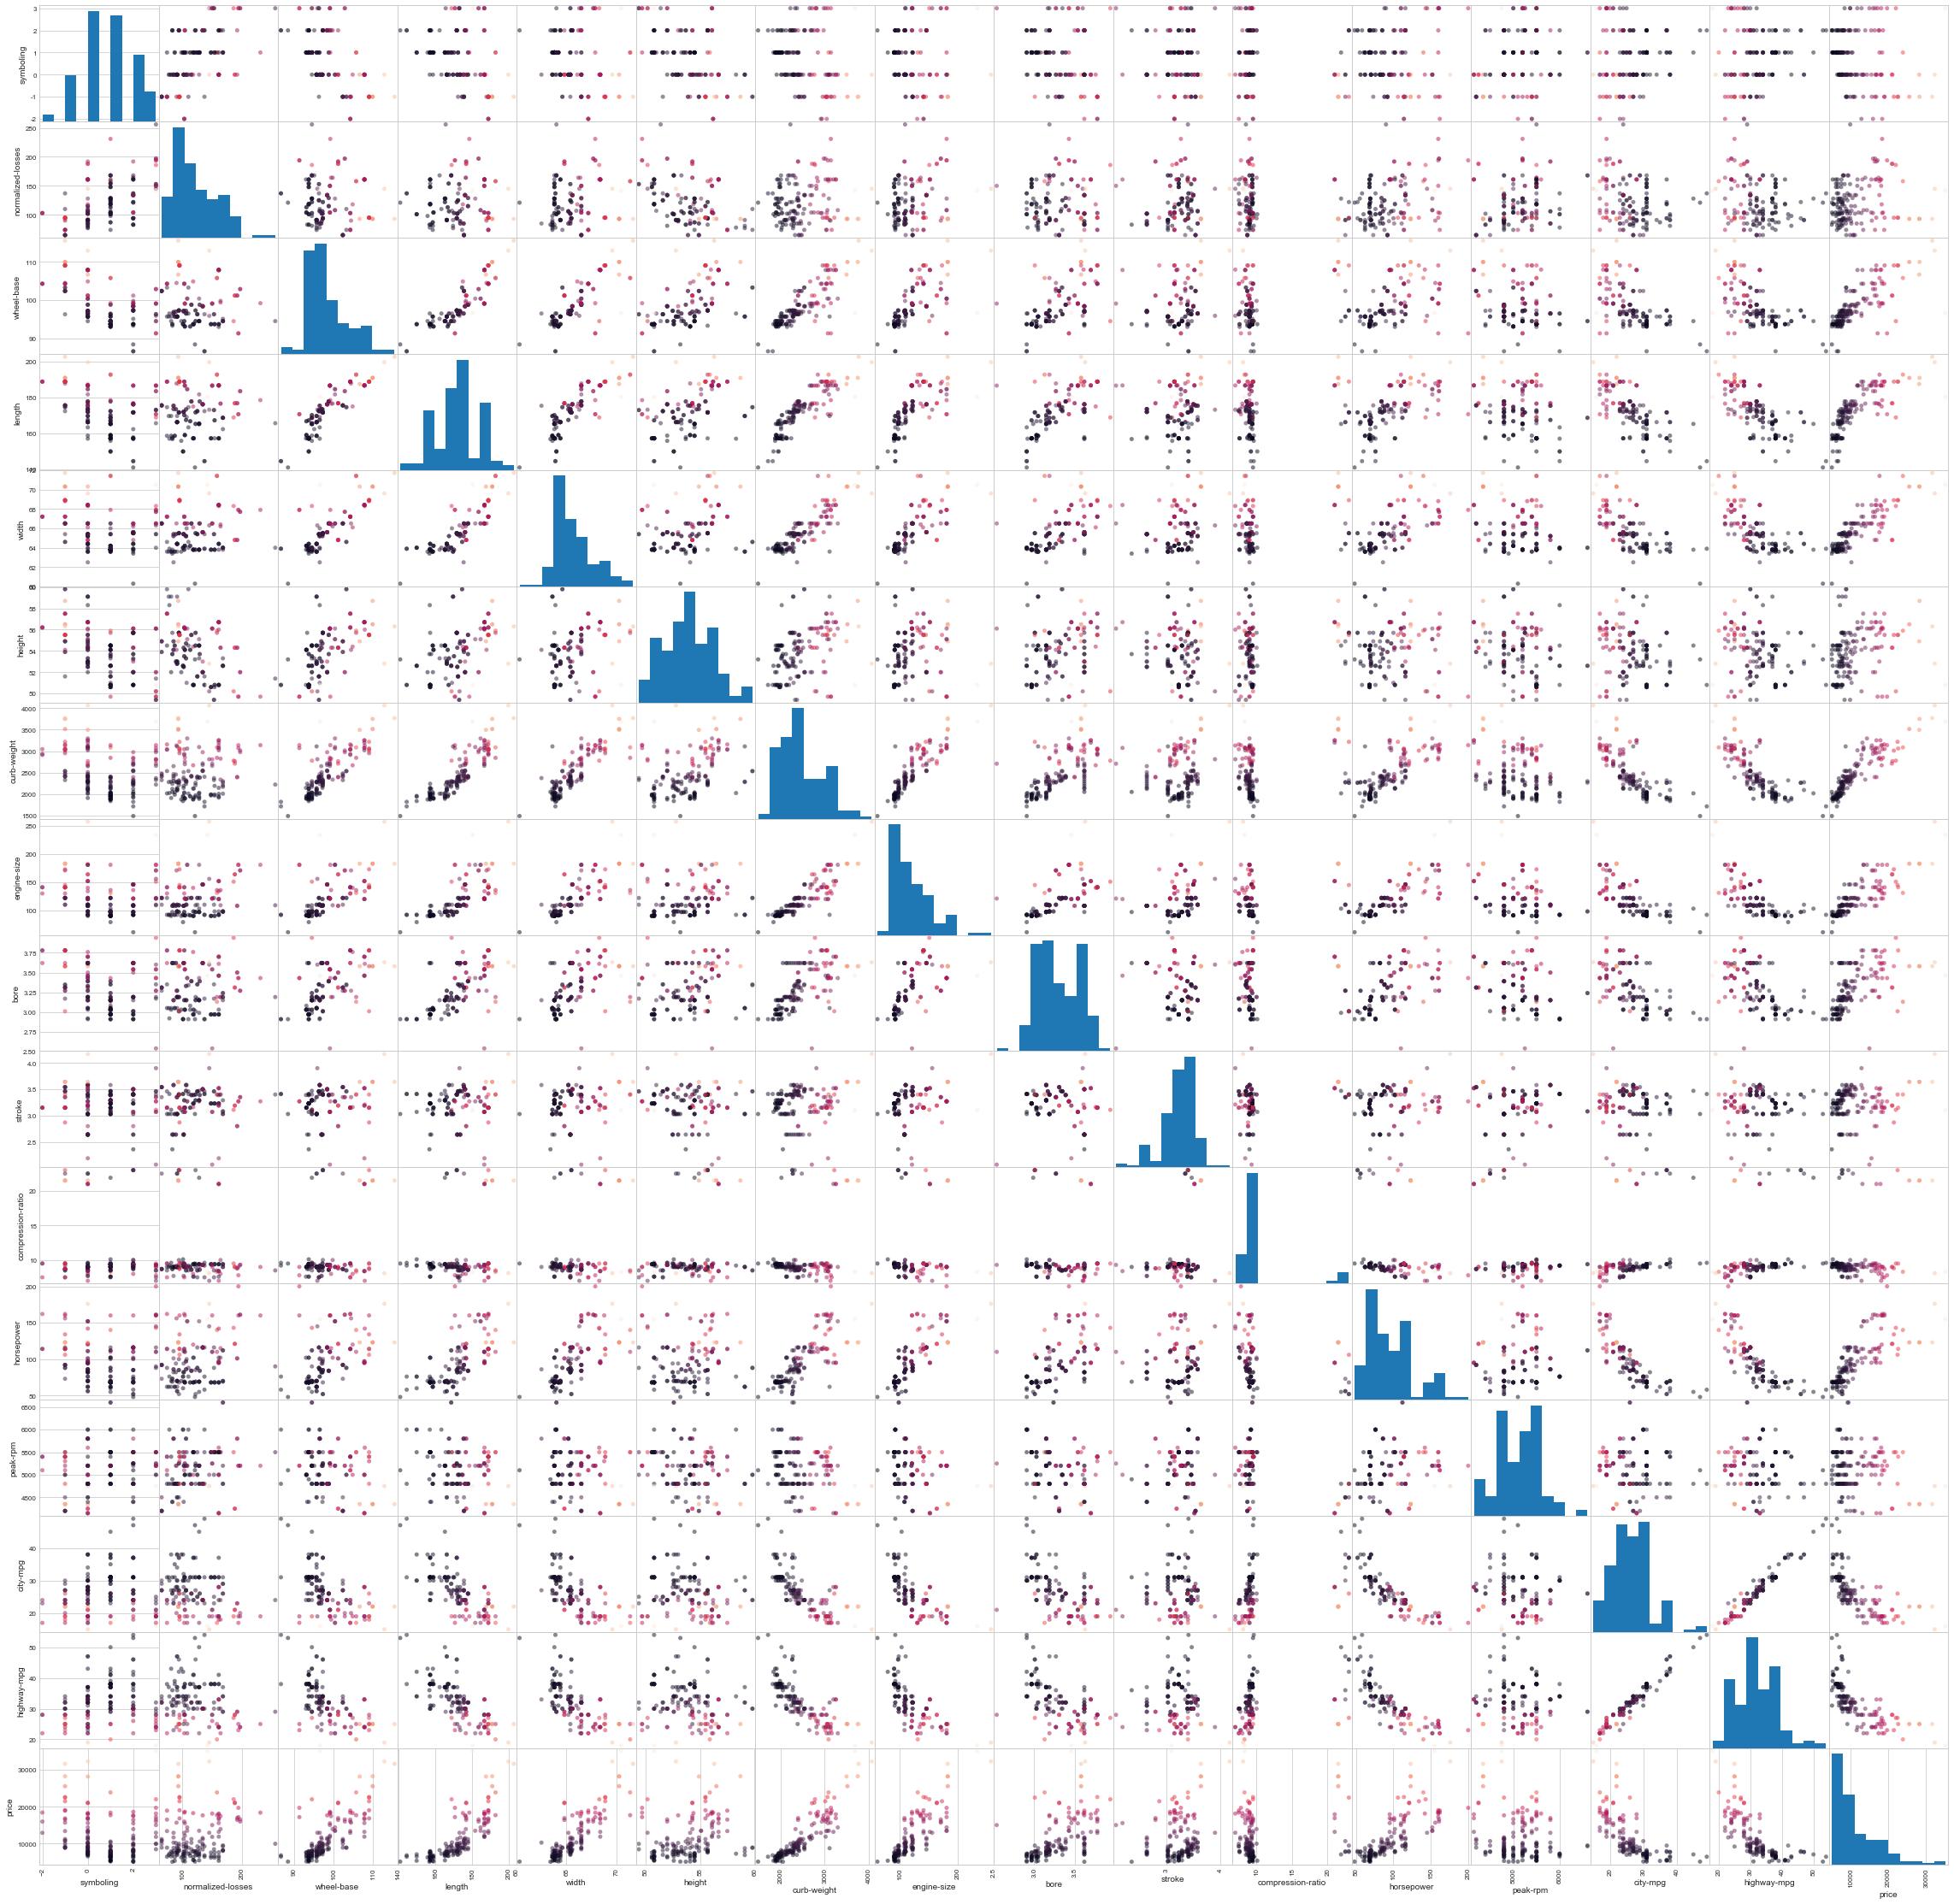

In [216]:
%matplotlib inline
_ = pd.plotting.scatter_matrix(Automobile_df,c=Automobile_df.loc[:,'price'], figsize=[40,40], s= 100)

As my client is Insurance company, I am going to see what are important / Most popular features in dataset.

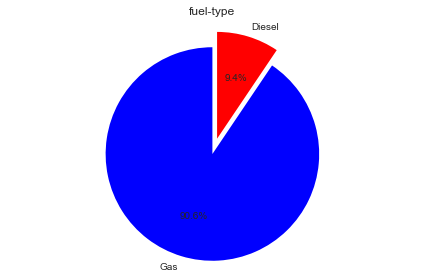

In [217]:
# sum the instances fuel-type
Gas= (Automobile_df['fuel-type'] == 'gas').sum()
Diesel = (Automobile_df['fuel-type'] == 'diesel').sum()

# put them into a list called proportions
proportions = [Gas, Diesel]

# Create a pie chart
plt.pie(
    # using proportions
    proportions,
    
    # with the labels being officer names
    labels = ['Gas', 'Diesel'],
    
    # with no shadows
    shadow = False,
    
    # with colors
    colors = ['blue','red'],
    
    # with one slide exploded out
    explode = (0.15 , 0),
    
    # with the start angle at 90%
    startangle = 90,
    
    # with the percent listed as a fraction
    autopct = '%1.1f%%'
    )

# View the plot drop above
plt.axis('equal')

# Set labels
plt.title("fuel-type")

# View the plot
plt.tight_layout()
plt.show()

Most of the cars are **Gas** cars in our data set. 

In [218]:
Body_Fuel_table = pd.crosstab(index=Automobile_df["fuel-system"], 
                          columns=Automobile_df["body-style"])
print(Body_Fuel_table) 

body-style   convertible  hardtop  hatchback  sedan  wagon
fuel-system                                               
1bbl                   0        0          7      3      1
2bbl                   0        1         28     25      9
idi                    0        1          1     12      1
mfi                    0        0          1      0      0
mpfi                   2        3         16     37      6
spdi                   0        0          3      2      0


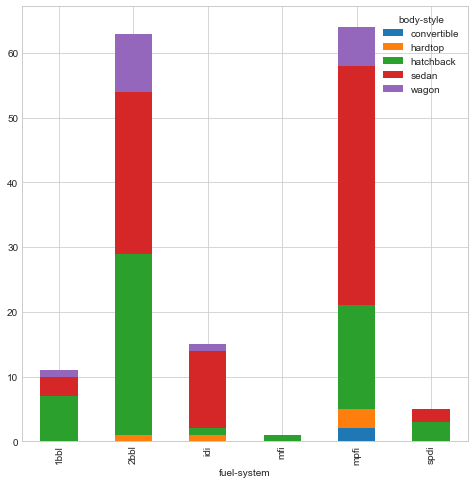

In [219]:
Body_Fuel_table.plot(kind="bar", 
                 figsize=(8,8),
                 stacked=True)

## IMP

Most popular combination is **Sedan and mpfi**. Insurance company should focus on this combination. Keeping some atractive deal on this can grab more customers, which is the result of more profit.

We can observe that the there are two main clusters of variables:  **city mpg and highway mpg**

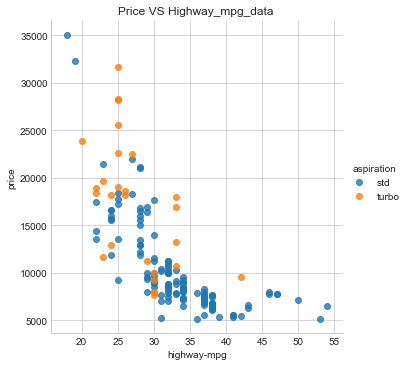

In [220]:
# creates the plot using
Price_highway_data = sns.lmplot(x = 'highway-mpg', y = 'price', data = Automobile_df, hue = 'aspiration', fit_reg=False)

# set title
Price_highway_data .set(title = 'Price VS Highway_mpg_data ')

There is negative correlation between these Price and Highway-MPG, an increase in one variable will cause a decrease in the other. There is a high correlation between these 2 cells. Graph also clearly shows distribution of aspiration. 
Std cars have high highway mpg and prices are low.

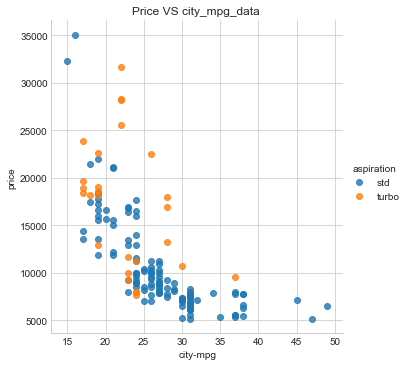

In [221]:
# creates the plot using
Price_highway_data = sns.lmplot(x = 'city-mpg', y = 'price', data = Automobile_df, hue = 'aspiration', fit_reg=False)

# set title
Price_highway_data .set(title = 'Price VS city_mpg_data ')

City mpg and highway mpg shows negative corelation with price.We can consider only one column in this case. This is called Feature reduction. We will take **"city -mpg"** column. 

Both  of these feature are likely distributed.

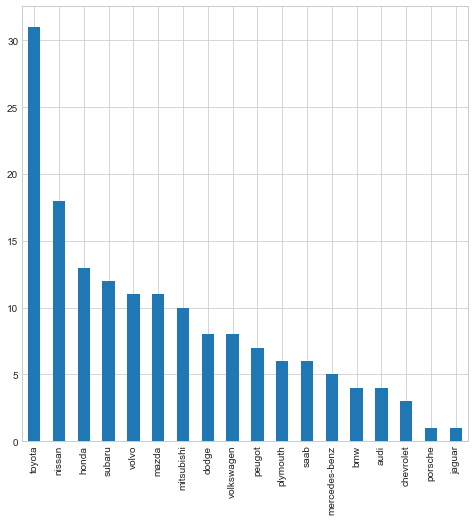

In [222]:
np.sort(Automobile_df['make'].unique())
Automobile_df['make'].value_counts().plot.bar(figsize= (8,8))

** Toyota ** cars are most famous cars.

C:\Users\Gandhi\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:57: FutureWarning:

reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead



(0.0, 50000.0)

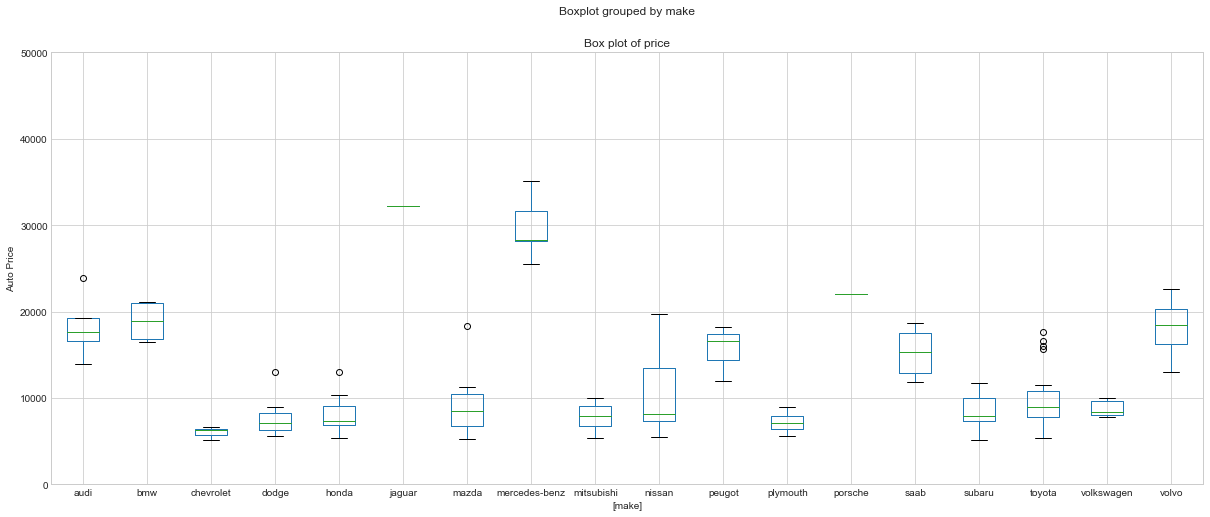

In [223]:
fig = plt.figure(figsize=(20,8)) # define plot area
ax = fig.gca() # define axis 
Automobile_df.loc[:,['price', 'make']].boxplot(by = 'make', ax = ax)
ax.set_title('Box plot of price') # Give the plot a main title
ax.set_ylabel('Auto Price')# Set text for y axis
ax.set_ylim(0.0, 50000.0) # Set the limits of the y axis

## IMP:
Above graph shows the price distribution as per make. We can clearly see that **Mercedes** and **Jaguar** have high prices compared to other make.

Auto Insurances must be priced to reflect the ** cars price**. Thus, the pricing of an insurance policy depends on the cost of price. Insurance should be high for the expensive cars.

Text(0,0.5,'price')

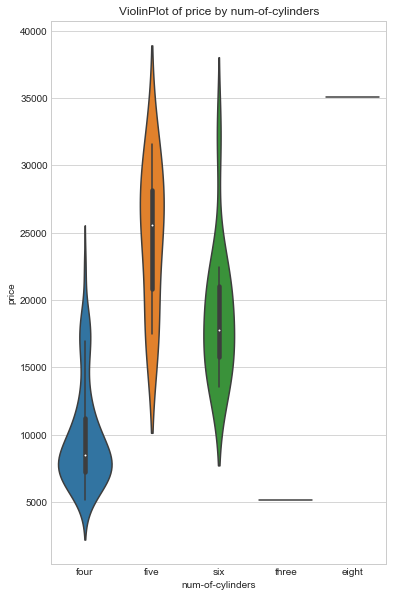

In [224]:
fig = plt.figure(figsize = (6,10))
ax= fig.gca()
sns.set_style("whitegrid")
sns.violinplot(x ='num-of-cylinders',y ='price', data=Automobile_df , ax=ax)
ax.set_title('ViolinPlot of price by num-of-cylinders') # Give the plot a main title
ax.set_xlabel('num-of-cylinders') # Set text for the x axis
ax.set_ylabel('price')# Set text for y axis

**Four cylinders **car are cheaper than five and six cylinders cars. Graph also shows that density of all cylinders. Four cylinder cars are more popular than the three cylendar. 

Insurance company should charge less for four cylendar cars.

In [225]:
Automobile_df['engine-location'].unique()

array(['front'], dtype=object)

All cars have **front engine**, I am going to remove ** engine-location ** column as there is nothing to compare. 

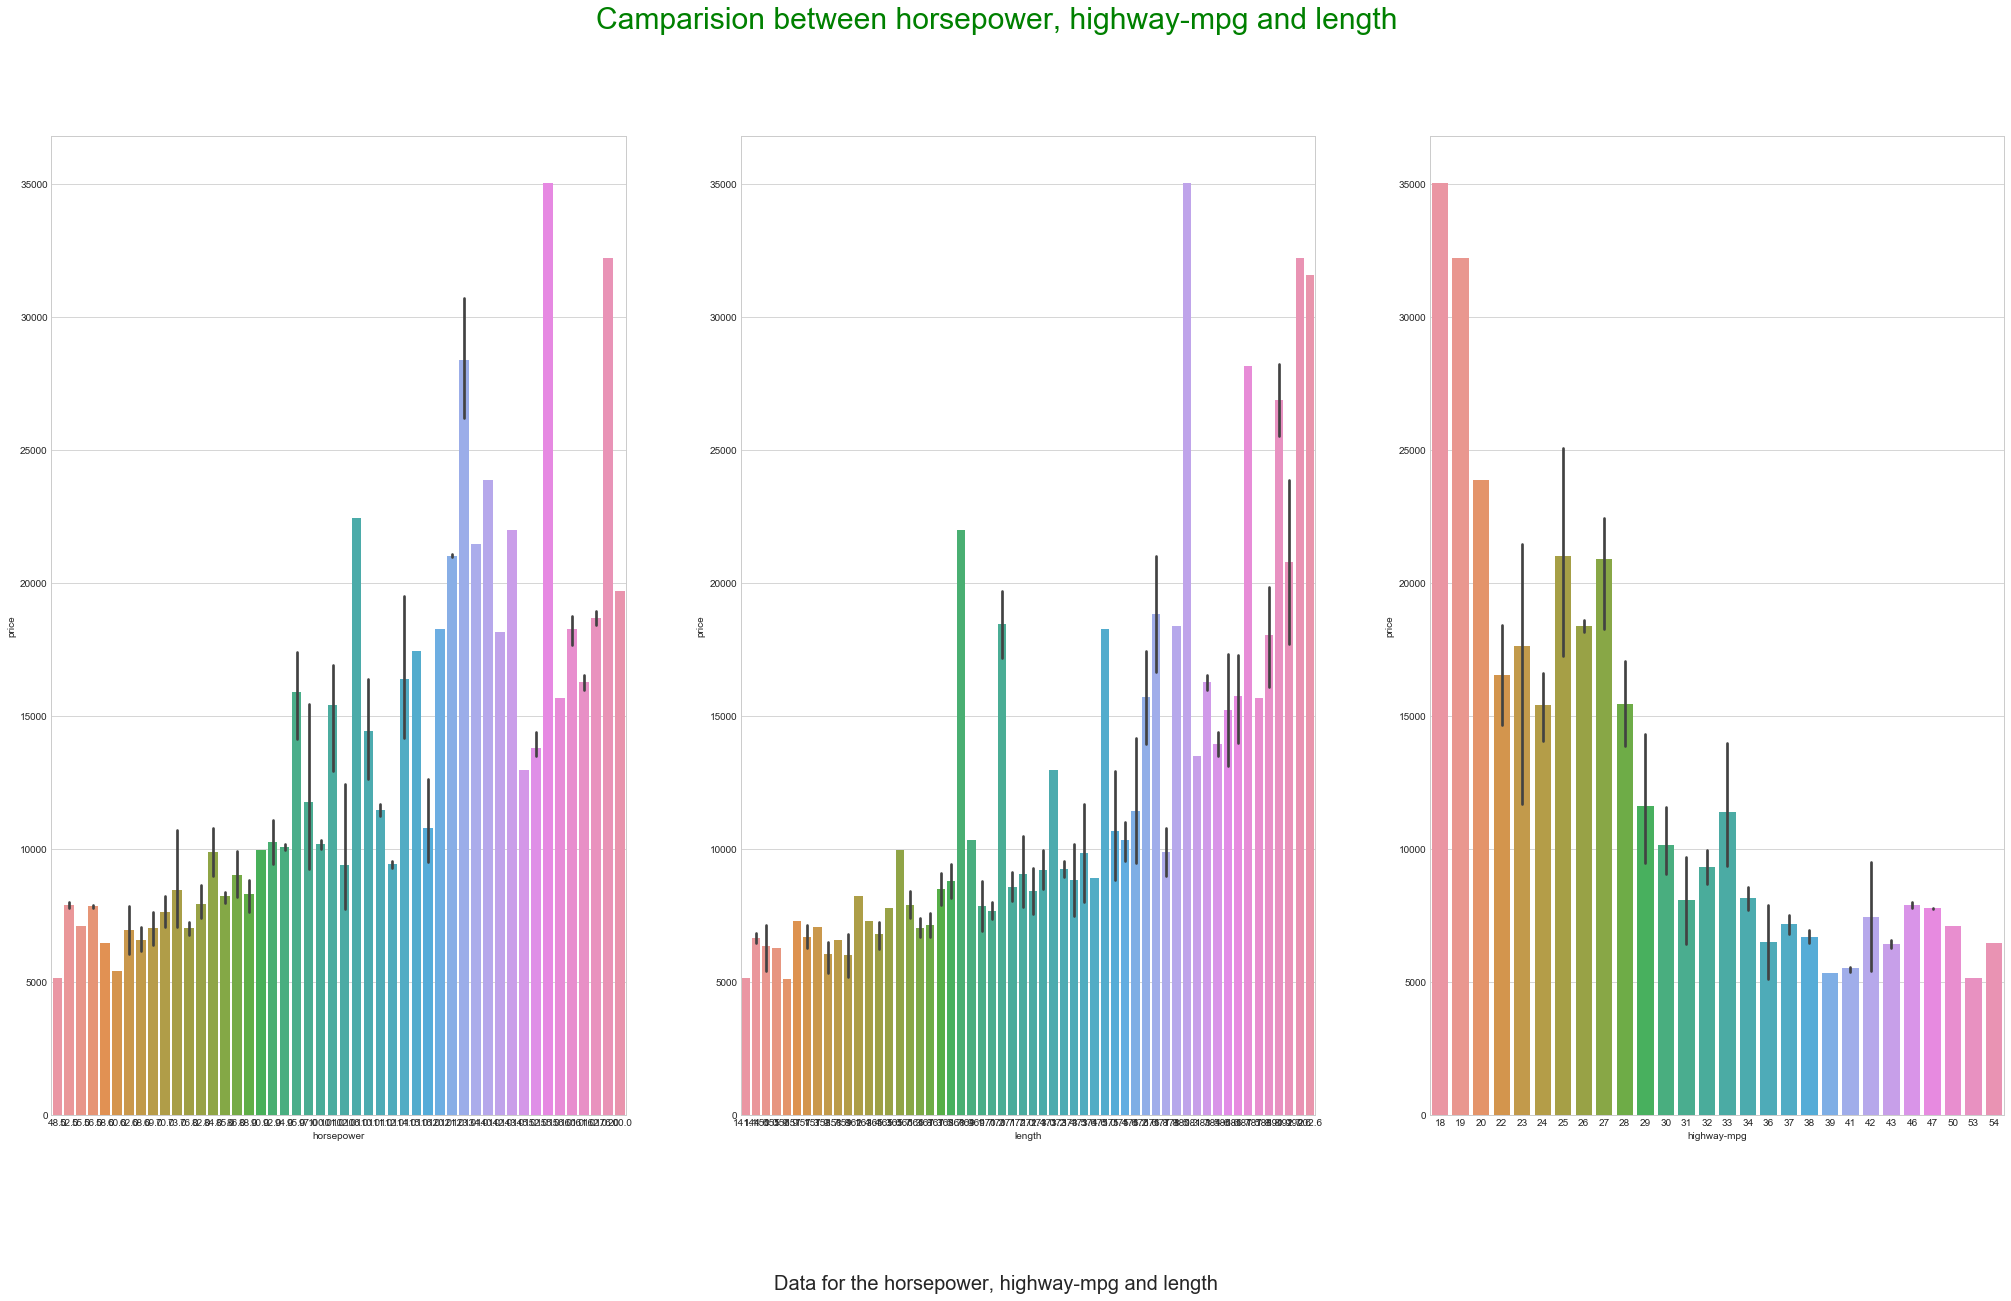

In [232]:
plt.rcParams["figure.figsize"] = (35,18)

y = Automobile_df.loc[:,'price']
x1 =Automobile_df.loc[:,'horsepower']
x2 =Automobile_df.loc[:,'length']
x3 =Automobile_df.loc[:,'highway-mpg']


ax = plt.subplot(1,3,1);
sns.barplot(x1,y)

ax2 = plt.subplot(1,3,2)
sns.barplot(x2, y)

ax2 = plt.subplot(1,3,3)
sns.barplot(x3, y)

plt.suptitle('Camparision between horsepower, highway-mpg and length',fontsize=30, color='green')

plt.figtext(0.5, - 0.01, "Data for the horsepower, highway-mpg and length", wrap=True,horizontalalignment='center', fontsize=20)
plt.show()

Graph clearly shows relation between horsepower, length and highway MPG. Horsepower and length are corelated to each other and both of them are almost perfect negatively correlated with city mpg and highway mpg, because usually powerful vehicle consumes more fuel.
Let's consider the **horsepower** for our calculations. Length feature is reducing from calcualtions.  

[   2544.92272374 -155520.40808187]


Text(0.5,1,'Checking relation between width with price')

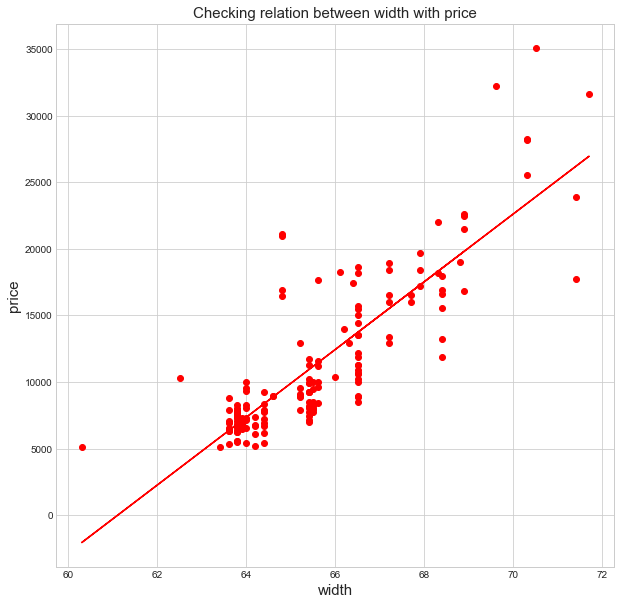

In [233]:
from scipy.interpolate import *
plt.rcParams["figure.figsize"] = (10,10)
x=Automobile_df['width']
y=Automobile_df['price']
p1 = np.polyfit(x,y,1)
print(p1)
plt.plot(x,y, 'ro')
plt.plot(x,np.polyval(p1,x), '-r')
plt.xlabel('width', fontsize = 15)
plt.ylabel('price', fontsize = 15)
plt.title('Checking relation between width with price', fontsize = 15)

[   835.39024728 -70643.18379578]


Text(0.5,1,'Checking relation between wheel-base with price')

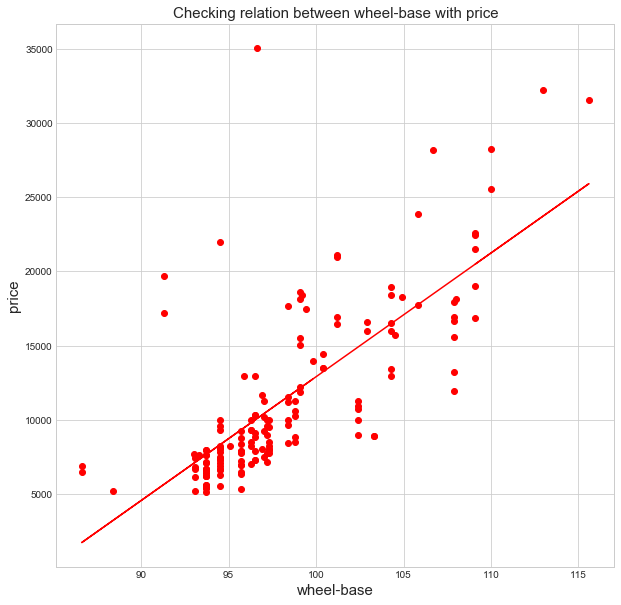

In [234]:
from scipy.interpolate import *
x=Automobile_df['wheel-base']
y=Automobile_df['price']
p1 = np.polyfit(x,y,1)
print(p1)
plt.plot(x,y, 'ro')
plt.plot(x,np.polyval(p1,x), '-r')
plt.xlabel('wheel-base', fontsize = 15)
plt.ylabel('price', fontsize = 15)
plt.title('Checking relation between wheel-base with price', fontsize = 15)

Wheel - base and width have positive relation with price. I am going to consider one column. Let's take **wheel - base **.

Text(0,0.5,'Engine-size')

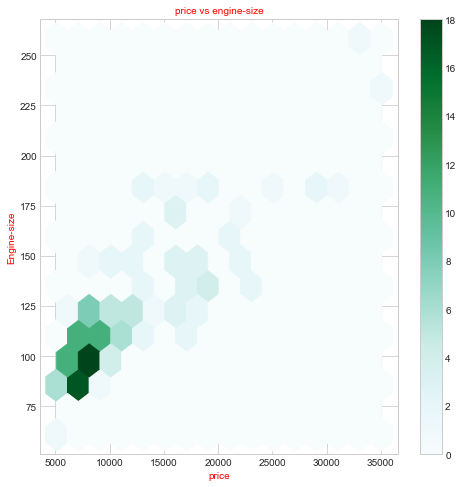

In [235]:
ax =plt.figure(figsize =(8,8)).gca()
Automobile_df.plot.hexbin(x='price',y='engine-size',gridsize =15,ax=ax)
ax.set_title('price vs engine-size', fontsize =10, color = 'r') # Give the plot a main title
ax.set_xlabel('price',fontsize =10, color = 'r')# Set text for y axis
ax.set_ylabel('Engine-size', fontsize =10, color = 'r')

Not going to consider engine size for further calculations

C:\Users\Gandhi\Anaconda3\lib\site-packages\seaborn\distributions.py:630: UserWarning:

Passing a 2D dataset for a bivariate plot is deprecated in favor of kdeplot(x, y), and it will cause an error in future versions. Please update your code.



Text(0,0.5,'curb-weight')

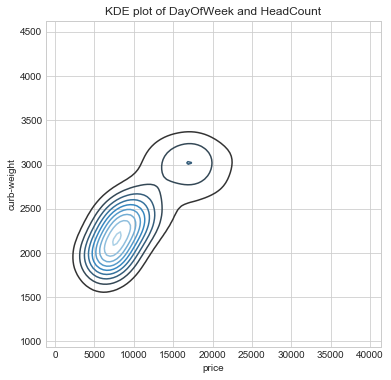

In [236]:
fig = plt.figure(figsize=(6,6)) # define plot area
ax = fig.gca() # define axis 
#sns.set_style("whitegrid")
sns.kdeplot(Automobile_df[['price', 'curb-weight' ]], ax = ax, cmap="Blues_d")
ax.set_title('KDE plot of DayOfWeek and HeadCount') # Give the plot a main title
ax.set_xlabel('price') # Set text for the x axis
ax.set_ylabel('curb-weight')# Set text for y axis

Not going to consider curb- weight for further calculations

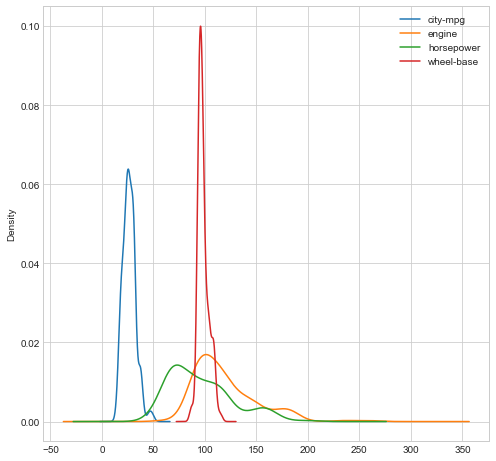

In [238]:
horsepower = Automobile_df['horsepower']
wheel =  Automobile_df['wheel-base']
engine =  Automobile_df['engine-size']
city =  Automobile_df['city-mpg']
data_df = pd.DataFrame({"engine":engine,
                        "horsepower":horsepower,
                       "wheel-base":wheel,
                        "city-mpg":city})

data_df.plot(kind="density",figsize=(8,8))

### Summary 

 The peak rpm, city mpg, highway mpg can be interpreted as fuel economy, while the horse power, bore, engine size can be interpreted as the engine power and curb weight, wheel base, length and width can be interpreted as the vehicle size. 
 
 
-- Selected Features - Make, no. of doors, no. of cylenders,engine type, wheel base, engine size, horse power, curb- weight, city-mpg

-- Removed features based on observations: Highway MPG, engine-location, width, length



In [239]:
Automobile_df['log_price']= np.log(Automobile_df['price'])

In [240]:
import numpy.random as nr
nr.seed(1357)
norm1 = Automobile_df['price']
norm2 = Automobile_df['log_price']

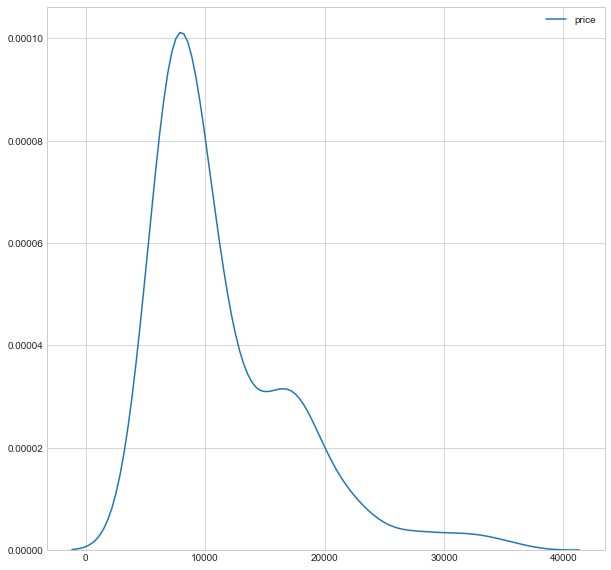

In [241]:
import seaborn
seaborn.kdeplot(Automobile_df['price'])

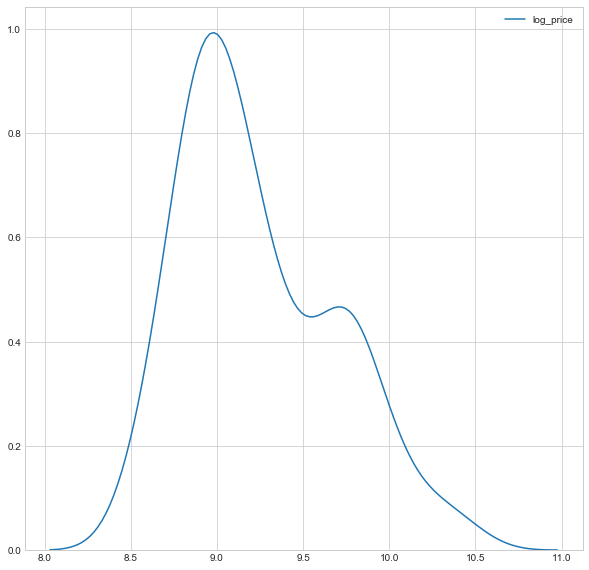

In [242]:
seaborn.kdeplot(Automobile_df['log_price'])

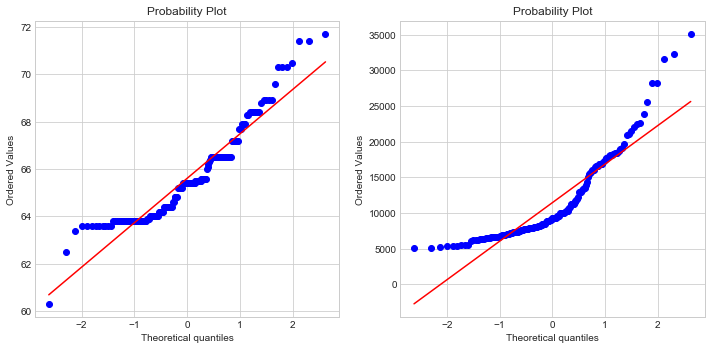

In [316]:
def qq_plot(vec1, vec2):
    import matplotlib.pyplot as plt
    import scipy.stats as ss
    plt.figure(figsize=(12,12)).gca() # define axis
    ax1 = plt.subplot(221) ## setup the left subplot
    ss.probplot(vec1, plot = ax1) ## Plot the left subplot
    ax1 = plt.subplot(222) ## Set up the right subplot
    ss.probplot(vec2, plot = ax1) ## Plot the right subplot
qq_plot(norm1, norm2) 


Here log_price points are more likely normally distributed, they are more tend to lie along the straight line on the Q-Q plot. p rice value appear to follow a slightly non-linear pattern: the points are bowed a bit away from the normality line on each end.

The curved pattern in fig. 1 st suggests that the price value are not normally distributed. The curved pattern in fig. 2 nd suggests that the log price value is closed to normally distribution.

we will consider **log_price value ** for calculations. 

I am going to select 2 features from data frame. **wheel-base and city-mpg** for further calculations.we can see that both values are not normaly distributed. 

### Part 1: Identify a likely distribution for price and several other features.

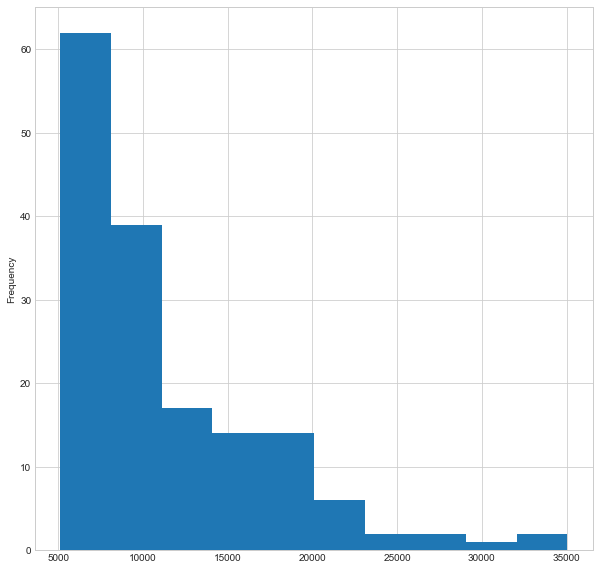

In [244]:
Automobile_df.loc[:,'price'].plot.hist()

Price value are not normally distributed.

The histogram shows that the price of automobiles are skewed toward the lower end, with only a few high priced autos.

<function matplotlib.pyplot.show>

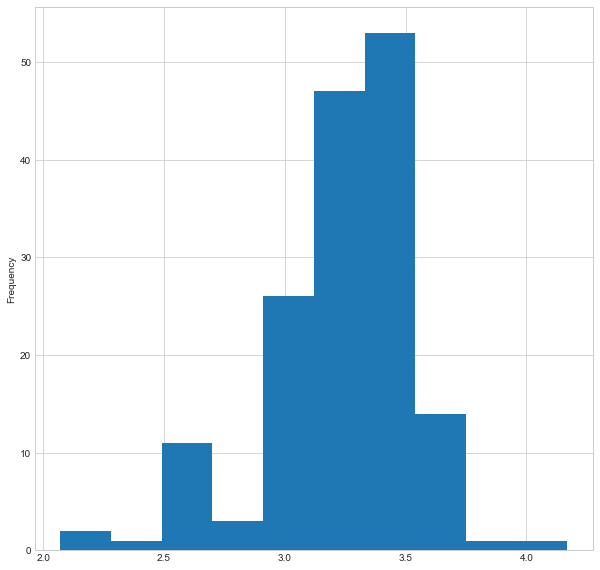

In [245]:
import matplotlib.pyplot as plt
Automobile_df ['stroke'].plot('hist')
plt.show

"stroke" is not likely price.

The histogram shows that the stroke of automobiles are skewed toward both the lower end, with shows that stroke between 3 and 3.5 have high no. of autos.

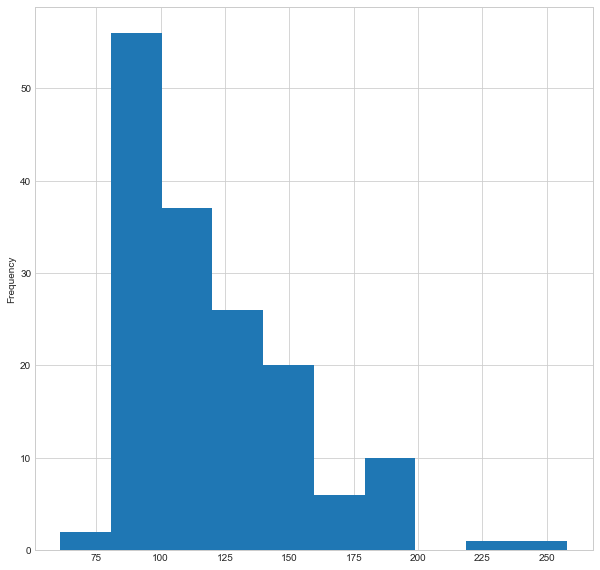

In [246]:
Automobile_df.loc[:,'engine-size'].plot.hist()

Engine size is more likely price ditributions.

The histogram shows that the Engine size of automobiles are skewed toward the lower end, with only a few high engine size autos.

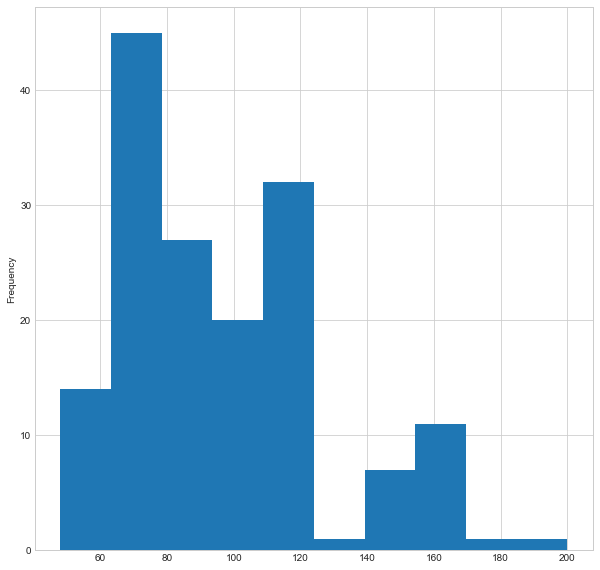

In [247]:
Automobile_df.loc[:,'horsepower'].plot.hist(bins = 10)

"horsepower" is not likely price.

The histogram shows that the horse power of automobiles are skewed toward the right lower end and a bit on left lower end.

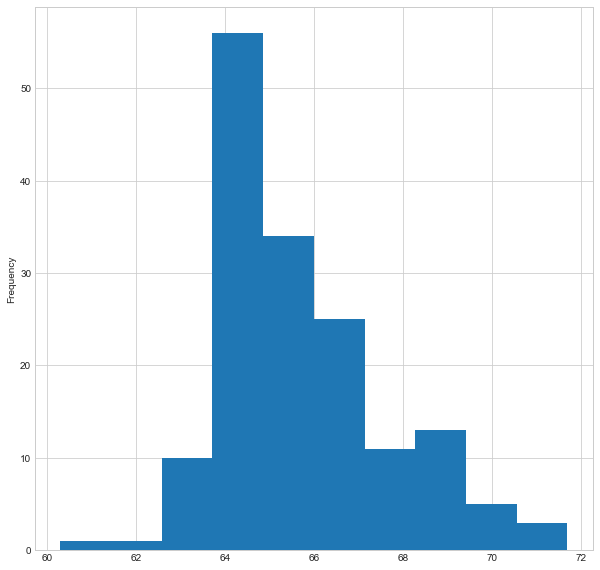

In [248]:
Automobile_df.loc[:,'width'].plot.hist(bins = 10)

width is more likely price ditributions.

The histogram shows that the width of automobiles are skewed toward both lower end, with only a few high width autos as well as low width autos

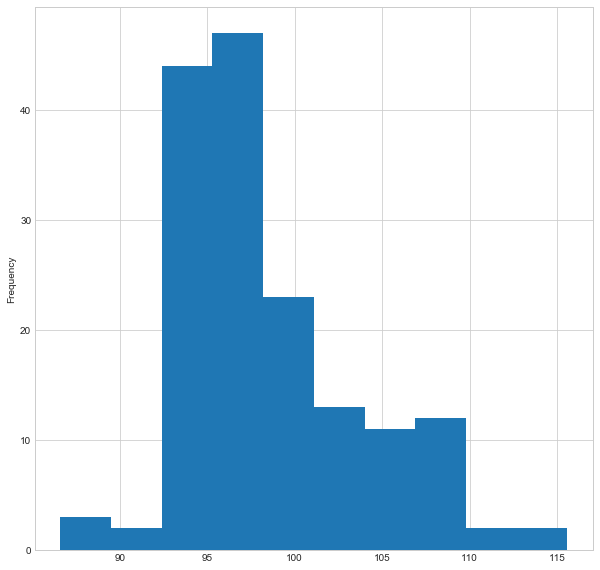

In [249]:
Automobile_df.loc[:,'wheel-base'].plot.hist(bins = 10)

"wheel-base" is more likely price ditributions.

The histogram shows that the wheel base of automobiles are skewed toward the both end but more on lower end.

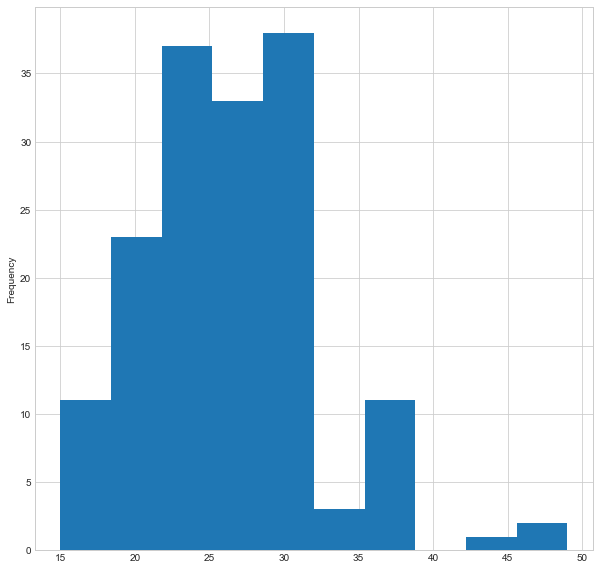

In [250]:
Automobile_df.loc[:,'city-mpg'].plot.hist(bins = 10)

"city-mpg" is not likely price.

The histogram shows that the city -mpg of automobiles are skewed toward the lower end, with only a few high city-mpg autos.

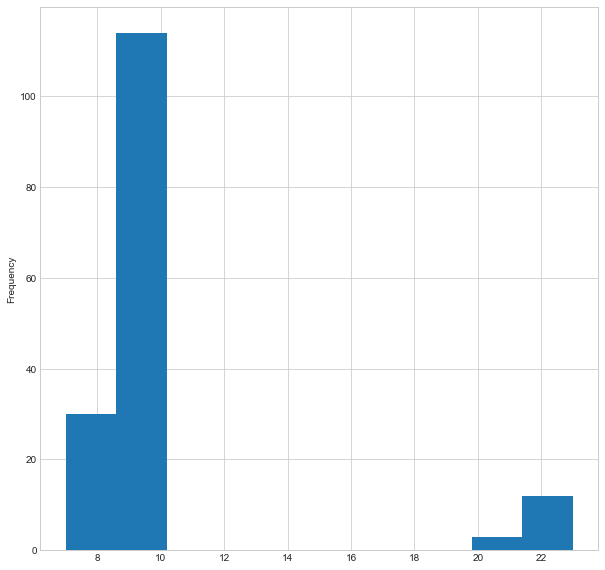

In [251]:
 Automobile_df.loc[:,'compression-ratio'].plot.hist()

"compression-ratio" is not likely price.


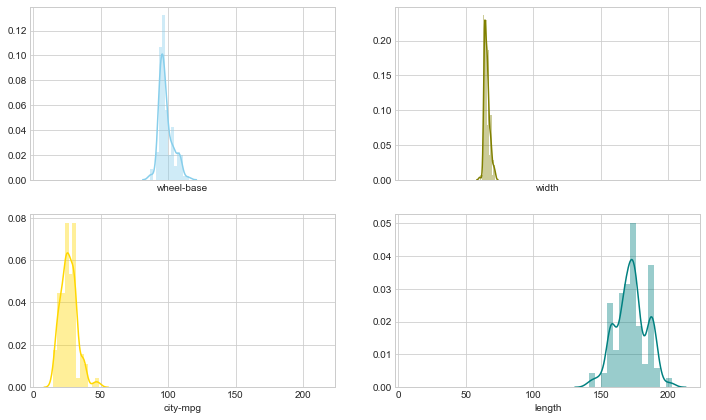

In [252]:
import seaborn as sns
import matplotlib.pyplot as plt
 
# plot
f, axes = plt.subplots(2, 2, figsize=(12, 7), sharex=True)
sns.distplot(Automobile_df['wheel-base'], color="skyblue", ax=axes[0, 0])
sns.distplot( Automobile_df['width'], color="olive", ax=axes[0, 1])
sns.distplot( Automobile_df['city-mpg'], color="gold", ax=axes[1, 0])
sns.distplot( Automobile_df['length'], color="teal", ax=axes[1, 1])

From all above Histrograms, it is clear that **wheel base and width ** are more likely distributed with price.

Verify this with ** Kolmogorov-Smirnov test ** 

The Kolmogorov-Smirnov test is a general test of the distribution of a sample. The K-S statistic is just the maximum vertical distance between CDF of the sample and the CDF of the theortical distribution

In [261]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
def plot_cums(dist1, dist2):
    ## sort the first data sample:
    data_sorted = np.sort(dist1)
    # calculate the proportional values of samples
    p = 1. * np.arange(len(dist1)) / (len(dist1) - 1)

    # Now plot as line and scatter plot. 
    plt.plot(data_sorted, p)
    plt.scatter(data_sorted, p, color = 'red')
    
    # sort the second data sample:
    data_sorted = np.sort(dist2)
    
    # And the second plot
    plt.plot(data_sorted, p, color = 'yellow')
    plt.scatter(data_sorted, p, color = 'green')

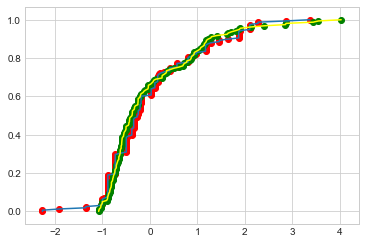

In [254]:
import numpy.random as nr
nr.seed(1357)
norm1 = Automobile_df.loc[:,'wheel-base']
norm2 = Automobile_df.loc[:,'price']
from sklearn.preprocessing import scale
norm1_s = scale(norm1)
norm2_s = scale(norm2)
plot_cums(norm1_s, norm2_s)  

Notice that the cumulative density plots of the standardized data are quite similar. 

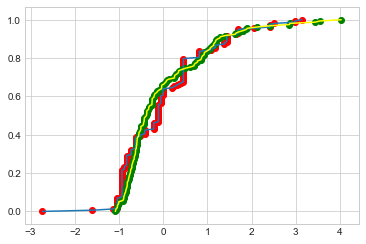

In [255]:
import numpy.random as nr
nr.seed(1357)
norm1 = Automobile_df.loc[:,'width']
norm2 = Automobile_df.loc[:,'price']
from sklearn.preprocessing import scale
norm1_s = scale(norm1)
norm2_s = scale(norm2)
plot_cums(norm1_s, norm2_s)  

Notice that, as you might expect, the two cumulative density function are quite similar. 

### Compute basic summary statistics by both classical, bootstrap and Bayesian methods

In [256]:
# Classical Method
Automobile_df.describe()

,symboling,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,log_price
count,159.000000,159.000000,159.000000,159.000000,159.000000,159.000000,159.000000,159.000000,159.000000,159.000000,159.000000,159.000000,159.000000,159.000000,159.000000,159.000000,159.000000
mean,0.735849,121.132075,98.264151,172.413836,65.607547,53.899371,2461.138365,119.226415,3.300126,3.236352,10.161132,95.836478,5113.836478,26.522013,32.081761,11445.729560,9.239539
std,1.193086,35.651285,5.167416,11.523177,1.947883,2.268761,481.941321,30.460791,0.267336,0.294888,3.889475,30.718583,465.754864,6.097142,6.459189,5877.856195,0.442375
min,-2.000000,65.000000,86.600000,141.100000,60.300000,49.400000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,15.000000,18.000000,5118.000000,8.540519
25%,0.000000,94.000000,94.500000,165.650000,64.000000,52.250000,2065.500000,97.000000,3.050000,3.105000,8.700000,69.000000,4800.000000,23.000000,28.000000,7372.000000,8.905439
50%,1.000000,113.000000,96.900000,172.400000,65.400000,54.100000,2340.000000,110.000000,3.270000,3.270000,9.000000,88.000000,5200.000000,26.000000,32.000000,9233.000000,9.130539
75%,2.000000,148.000000,100.800000,177.800000,66.500000,55.500000,2809.500000,135.000000,3.560000,3.410000,9.400000,114.000000,5500.000000,31.000000,37.000000,14719.500000,9.596691
max,3.000000,256.000000,115.600000,202.600000,71.700000,59.800000,4066.000000,258.000000,3.940000,4.170000,23.000000,200.000000,6600.000000,49.000000,54.000000,35056.000000,10.464702


One more method is central Limit Theorm. Let's use that for 3 features.

I am going to select 2 features from data frame. wheel-base and city-mpg, both values are not normaly distributed. But using central Limit Theorm, we can prove the distribution of the mean of the sample will be Normal.

3 rd feature is price.Here I am taking Log Price.

In [257]:
# The central Limit Theorm
x =Automobile_df['log_price']

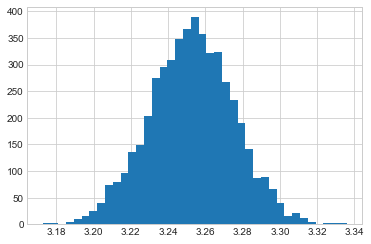

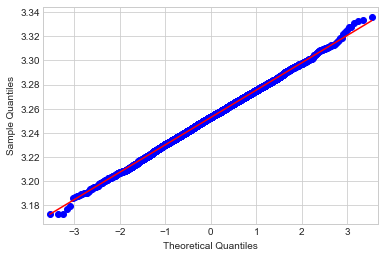

In [317]:
import numpy
from matplotlib import pyplot
import statsmodels.api as sm
x_means = numpy.array([
        numpy.random.choice(x, size=100, replace=True).mean() # choose 50 random samples from the distribution and take the mean
        for i in range(5000)]) # do this 500 times

breaks = numpy.linspace(x_means.min(), x_means.max(), num=40)
_ = pyplot.hist(x_means, bins=breaks)
_ = sm.qqplot(x_means, line='s') # standardized line, the expected order statistics are scaled by 
                                 # the standard deviation of the given sample and have the mean added to them

The distribution of the sample means is close to Normal, even though the population is not.

In [259]:
pop_mean = x_means.mean()
pop_std = x_means.std()
print('Estimated mean (%.3f) vs actual mean (%.3f)' % (pop_mean, x.mean()))
print('sample mean s.d. (%.3f) vs data s.d. (%.3f)' % (pop_std, x.std())) # these standard devations are meant to be different
                                                                          # one is the standard deviation of the samples,
                                                                          # the other is the standard deviation of the sample means
                                                                          # it makes sense the sample means would have less variance

Estimated mean (9.240) vs actual mean (9.240)
sample mean s.d. (0.045) vs data s.d. (0.442)


Please notice ** estimated mean and actual mean ** are same.

In [264]:
import scipy
import scipy.stats as ss
alpha = 0.05 # significance level
half_width = scipy.stats.norm.ppf(1-alpha/2, loc=pop_mean, scale=pop_std) - pop_mean
print('The half width is %.2f' % half_width)

ci_low = pop_mean - half_width
ci_high = pop_mean + half_width

print('The actual mean is %.2f' % x.mean())
print('The %d CI is (%.2f , %.2f)' % (100*(1-alpha), ci_low, ci_high))

The half width is 0.09
The actual mean is 9.24
The 95 CI is (9.15 , 9.33)


#### The central Limit Theorm for wheel base

Estimated mean (4.586) vs actual mean (4.586)
sample mean s.d. (0.005) vs data s.d. (0.052)
The half width is 0.01
The actual mean is 4.59
The 95 CI is (4.58 , 4.60)


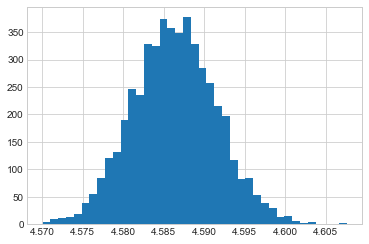

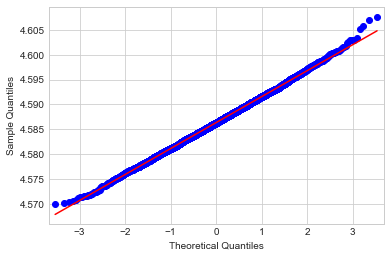

In [265]:
# The central Limit Theorm
x =np.log(Automobile_df['wheel-base'])
x_means = numpy.array([
        numpy.random.choice(x, size=100, replace=True).mean() # choose 50 random samples from the distribution and take the mean
        for i in range(5000)]) # do this 500 times

breaks = numpy.linspace(x_means.min(), x_means.max(), num=40)
_ = pyplot.hist(x_means, bins=breaks)
_ = sm.qqplot(x_means, line='s') # standardized line, the expected order statistics are scaled by 
                                 # the standard deviation of the given sample and have the mean added to them
    
pop_mean = x_means.mean()
pop_std = x_means.std()
print('Estimated mean (%.3f) vs actual mean (%.3f)' % (pop_mean, x.mean()))
print('sample mean s.d. (%.3f) vs data s.d. (%.3f)' % (pop_std, x.std()))

alpha = 0.05 # significance level
half_width = scipy.stats.norm.ppf(1-alpha/2, loc=pop_mean, scale=pop_std) - pop_mean
print('The half width is %.2f' % half_width)

ci_low = pop_mean - half_width
ci_high = pop_mean + half_width

print('The actual mean is %.2f' % x.mean())
print('The %d CI is (%.2f , %.2f)' % (100*(1-alpha), ci_low, ci_high))

#### The central Limit Theorm for city -MPG

Estimated mean (3.253) vs actual mean (3.252)
sample mean s.d. (0.022) vs data s.d. (0.227)
The half width is 0.04
The actual mean is 3.25
The 95 CI is (3.21 , 3.30)


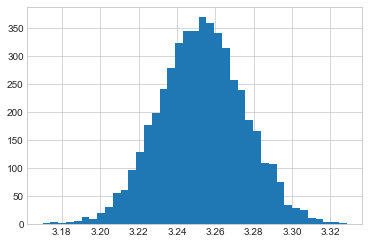

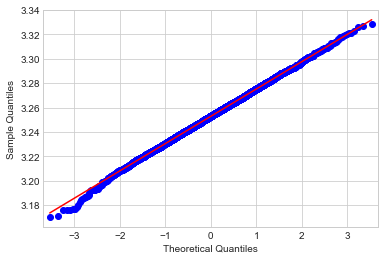

In [266]:
# The central Limit Theorm
x =np.log(Automobile_df['city-mpg'])
x_means = numpy.array([
        numpy.random.choice(x, size=100, replace=True).mean() # choose 50 random samples from the distribution and take the mean
        for i in range(5000)]) # do this 500 times

breaks = numpy.linspace(x_means.min(), x_means.max(), num=40)
_ = pyplot.hist(x_means, bins=breaks)
_ = sm.qqplot(x_means, line='s') # standardized line, the expected order statistics are scaled by 
                                 # the standard deviation of the given sample and have the mean added to them
    
pop_mean = x_means.mean()
pop_std = x_means.std()
print('Estimated mean (%.3f) vs actual mean (%.3f)' % (pop_mean, x.mean()))
print('sample mean s.d. (%.3f) vs data s.d. (%.3f)' % (pop_std, x.std()))

alpha = 0.05 # significance level
half_width = scipy.stats.norm.ppf(1-alpha/2, loc=pop_mean, scale=pop_std) - pop_mean
print('The half width is %.2f' % half_width)

ci_low = pop_mean - half_width
ci_high = pop_mean + half_width

print('The actual mean is %.2f' % x.mean())
print('The %d CI is (%.2f , %.2f)' % (100*(1-alpha), ci_low, ci_high))

#### bootstrap Mathod

Let's use **bootstrap Mathod**. For this we will use No. of doors feature. 

Text(0,0.5,'price')

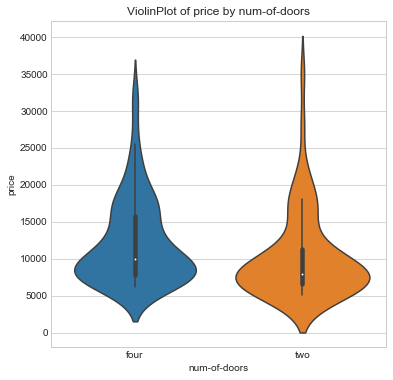

In [267]:
fig= plt.figure(figsize=(6,6))
ax=fig.gca()
sns.set_style("whitegrid")
sns.violinplot(x ='num-of-doors',y ='price', data=Automobile_df , ax=ax)
ax.set_title('ViolinPlot of price by num-of-doors') # Give the plot a main title
ax.set_xlabel('num-of-doors') # Set text for the x axis
ax.set_ylabel('price')# Set text for y axis


The price of four and two doors cars overlap quite a lot. 
The outliers of price for both doors cars are clearly visible.
The median (white dot) for two doors car is low compared to the four doors car.
Inner quartiles range and wiskers at +/-2.5 of the IQR for two doors cars and four doors cars have overlapped in small portion

In [269]:
four = Automobile_df[Automobile_df['num-of-doors'] == 'four']
two = Automobile_df[Automobile_df['num-of-doors'] == 'two']

len(four), len(two)

(95, 64)

In [301]:
def plot_hist(x, bins, p=5):
    # Plot the distribution and mark the mean
    pyplot.hist(x, alpha=.5, bins=bins)
    pyplot.axvline(x.mean())
    # central 100*(1-p)% of data   
    pyplot.axvline(numpy.percentile(x, p/2.), color='red', linewidth=3)
    pyplot.axvline(numpy.percentile(x, 100-p/2.), color='red', linewidth=3)
    
def plot_dists(a, b, nbins, a_label='pop_A', b_label='pop_B', p=5):
    # Create a single sequence of bins to be shared across both
    # distribution plots for visualization consistency.
    combined = pandas.concat([a, b])
    #create a series of bins
    breaks = numpy.linspace( 
        combined.min(), 
        combined.max(), 
        num=nbins+1)

    pyplot.subplot(2, 1, 1)
    plot_hist(a, bins=breaks)
    pyplot.title(a_label)
    
    pyplot.subplot(2, 1, 2)
    plot_hist(b, bins=breaks)
    pyplot.title(b_label)
        
    pyplot.tight_layout() # cleaner plot layout

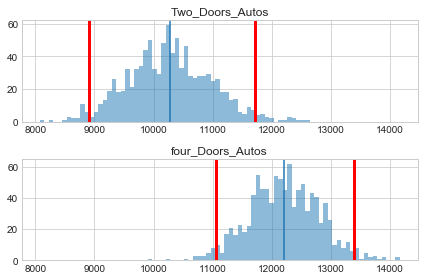

In [302]:
import pandas
n_replicas = 1000 # look at this many re-samples 

#genetate a series of re-sample means
four_bootstrap_means = pandas.Series([
    four.sample(frac=1, replace=True).price.mean()# take the mean of each sample
    for i in range(n_replicas)])

two_bootstrap_means = pandas.Series([
        two.sample(frac=1, replace=True).price.mean()# take the mean of each sample
        for i in range(n_replicas)])

plot_dists(two_bootstrap_means, four_bootstrap_means, 
           nbins=80, a_label='Two_Doors_Autos', b_label='four_Doors_Autos')

You can see that the distributions of the price of the 2 doors and 4 doors overlap. But, are the means significantly different.

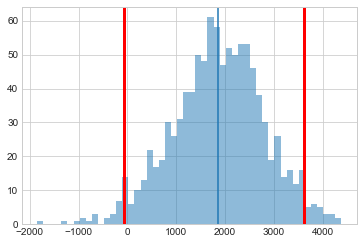

In [303]:
diffs = []
for i in range(n_replicas):
    sample = Automobile_df.sample(frac=1, replace=True)
    four_sample_mean = sample[sample['num-of-doors']=='four'].price.mean()
    two_sample_mean = sample[sample['num-of-doors']=='two'].price.mean()
    diffs.append(four_sample_mean - two_sample_mean)
diffs = pandas.Series(diffs)

plot_hist(diffs, bins =50)

The distribution of the difference in means is starts from zero. As before, we can infer that the means of the two populations are not significantly different. 

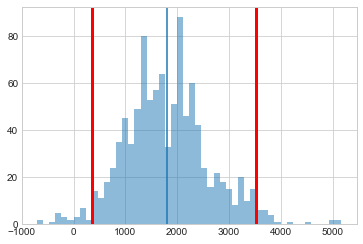

In [304]:
median_diffs = []
for i in range(n_replicas):
    sample = Automobile_df.sample(frac=1, replace=True)
    four_sample_median = sample[sample['num-of-doors']=='four'].price.median()
    two_sample_median = sample[sample['num-of-doors']=='two'].price.median()
    median_diffs.append(four_sample_median - two_sample_median)
median_diffs = pandas.Series(median_diffs)

plot_hist(median_diffs, bins =50)

The chart shows that the bootstrap distribution of the difference in medians. The confidence interval does not overlaps zero, so we must not accept the null hypothesis that the difference in medians is zero.

In [365]:
def t_test(a, b, alpha, alternative='two-sided'):
    from scipy import stats
    import scipy.stats as ss
    import pandas as pd
    import statsmodels.stats.weightstats as ws
    
    diff = a.mean() - b.mean()

    res = ss.ttest_ind(a, b)
      
    means = ws.CompareMeans(ws.DescrStatsW(a), ws.DescrStatsW(b))
    confint = means.tconfint_diff(alpha=alpha, alternative=alternative, usevar='unequal') 
    degfree = means.dof_satt()

    index = ['DegFreedom', 'Difference', 'Statistic', 'PValue', 'Low95CI', 'High95CI']
    return pd.Series([degfree, diff, res[0], res[1], confint[0], confint[1]], index = index)   
   


In [366]:
four = Automobile_df.loc[Automobile_df.loc[:, 'num-of-doors'] == 'four', 'price']
two = Automobile_df.loc[Automobile_df.loc[:, 'num-of-doors'] == 'two', 'price']

test = t_test(four, two, 0.05)
test


DegFreedom     135.043019
Difference    1937.386020
Statistic        2.059006
PValue           0.041146
Low95CI         75.426517
High95CI      3799.345523
dtype: float64

#### Let's use bootstrap on one more feature drive - wheel

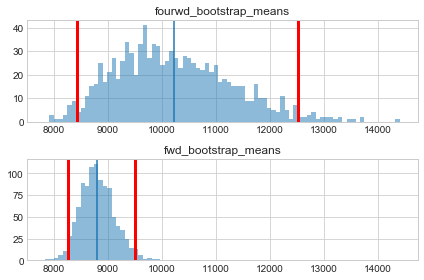

In [336]:
fourwd = Automobile_df[Automobile_df['drive-wheels'] == '4wd' ]
fwd = Automobile_df[Automobile_df['drive-wheels'] == 'fwd' ]
rwd = Automobile_df[Automobile_df['drive-wheels'] == 'rwd']

len(fourwd), len(fwd), len(rwd)

import pandas
n_replicas = 1000 # look at this many re-samples 

#genetate a series of re-sample means
fourwd_bootstrap_means = pandas.Series([
    fourwd.sample(frac=1, replace=True).price.mean()# take the mean of each sample
    for i in range(n_replicas)])

fwd_bootstrap_means = pandas.Series([
        fwd.sample(frac=1, replace=True).price.mean()# take the mean of each sample
        for i in range(n_replicas)])

rwd_bootstrap_means = pandas.Series([
        rwd.sample(frac=1, replace=True).price.mean()# take the mean of each sample
        for i in range(n_replicas)])

plot_dists(fourwd_bootstrap_means, fwd_bootstrap_means, 
           nbins=80, a_label='fourwd_bootstrap_means', b_label='fwd_bootstrap_means')


In [367]:
fourwd = Automobile_df.loc[Automobile_df.loc[:, 'drive-wheels'] == '4wd', 'price']
fwd = Automobile_df.loc[Automobile_df.loc[:, 'drive-wheels'] == 'fwd', 'price']

test = t_test(fourwd, fwd, 0.05)
test



DegFreedom       8.012692
Difference    1429.961905
Statistic        1.232987
PValue           0.220186
Low95CI      -1342.470851
High95CI      4202.394660
dtype: float64

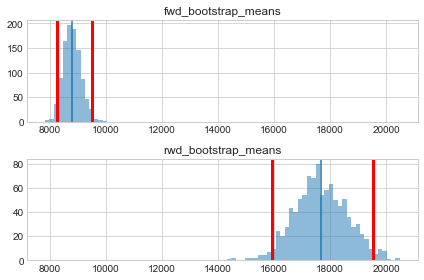

In [337]:
plot_dists(fwd_bootstrap_means, rwd_bootstrap_means, 
           nbins=80, a_label='fwd_bootstrap_means', b_label='rwd_bootstrap_means')

In [368]:
rwd = Automobile_df.loc[Automobile_df.loc[:, 'drive-wheels'] == 'rwd', 'price']
fwd = Automobile_df.loc[Automobile_df.loc[:, 'drive-wheels'] == 'fwd', 'price']

test = t_test(four, two, 0.05)
test


DegFreedom     135.043019
Difference    1937.386020
Statistic        2.059006
PValue           0.041146
Low95CI         75.426517
High95CI      3799.345523
dtype: float64

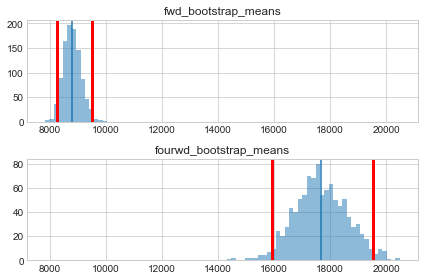

In [338]:
plot_dists(fwd_bootstrap_means, rwd_bootstrap_means, 
           nbins=80, a_label='fwd_bootstrap_means', b_label='fourwd_bootstrap_means')

In [369]:
fourwd = Automobile_df.loc[Automobile_df.loc[:, 'drive-wheels'] == 'fourwd', 'price']
fwd = Automobile_df.loc[Automobile_df.loc[:, 'drive-wheels'] == 'fwd', 'price']

test = t_test(four, two, 0.05)
test

DegFreedom     135.043019
Difference    1937.386020
Statistic        2.059006
PValue           0.041146
Low95CI         75.426517
High95CI      3799.345523
dtype: float64

#### Bayesian methods

11925.12
Mean of heights: 11925.1


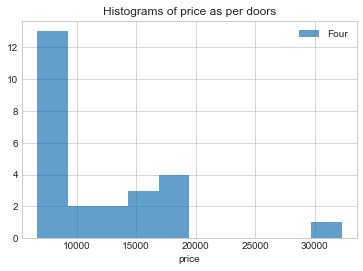

In [297]:
num_samples = 25
four_B = Automobile_df[Automobile_df['num-of-doors'] == 'four'].sample(n=num_samples)# create a sample of 25 from the original sample
two_B = Automobile_df[Automobile_df['num-of-doors'] == 'two'].sample(n=num_samples)
pyplot.title('Histograms of price as per doors')
four_B.price.hist(label='Four', bins=10, alpha=.7)
#two_B.price.hist(label='two', bins=10, alpha=.7)
pyplot.xlabel('price')
pyplot.legend()

mean_price = numpy.mean([four_B.price])
print(mean_price)
print('Mean of heights: %.1f' % mean_price)

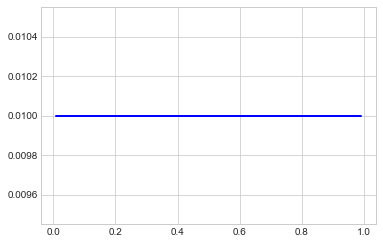

In [343]:
import numpy
N = 100
p = numpy.linspace(.01, .99, num=N) # parameter space
pp = [1./N] * N # prior probability
pyplot.plot(p, pp, linewidth=2, color='blue')

In [298]:
def posterior(prior, like):
    post = prior * like # compute the product of the probabilities0
    return post / sum(post) # normalize the distribution to sum to unity

Mean = 11925.120, Standard deviation = 5851.851


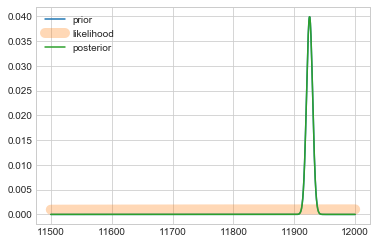

In [340]:
N = 1000
# compute the parameter space. In this case the parameter we're interested in is the mean, so we'll look for means
# in the range or heights between 60 and 75
p = numpy.linspace(11500, 12000, num=N)
# create a prior
# ou prior will look at values around the actual mean with a standard deviation of 5
# visually we can see this is fairly diffuse (less informative prior)
pp = scipy.stats.norm.pdf(p, loc=four_B.price.mean(), scale=5)
pp = pp / pp.sum() # normalize

# likelihood function
def comp_like(p, x): 
    # p: parameter space values
    # x: data
    variance = numpy.std(x)**2 # sigmasqr
    x_mean = numpy.asarray(x).mean()  # xbar
    print('Mean = %.3f, Standard deviation = %.3f' % (x_mean, numpy.std(x)))
    n = len(x)
    l = numpy.exp(-n * numpy.square(x_mean - p) / (2 * variance))
    return l / l.sum()

# compute likelihood and posterior
Four_Door = comp_like(p, four_B.price)
post_Four = posterior(pp, Four_Door)

pyplot.plot(p, pp, label='prior')
pyplot.plot(p, Four_Door, label='likelihood', alpha=.3, linewidth=10)
pyplot.plot(p, post_Four, label='posterior')
pyplot.legend()

#### Correctly use hypothesis tests to determine if the differences in pairs and multiple populations are significant:

#### Index
- Classical tests
- Tukey’s Honest Significant Differences (HSD)
- Bootstrap methods
- Bayesian model

#### Classical Method
Starting with the feature Body -style

C:\Users\Gandhi\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:57: FutureWarning:

reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead



(0.0, 50000.0)

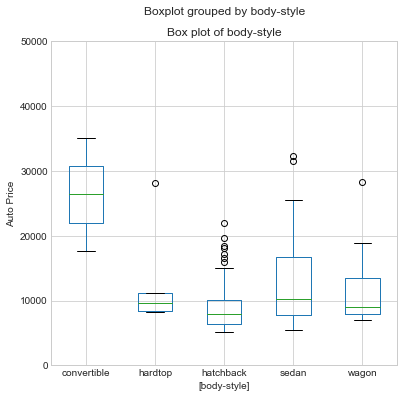

In [305]:
fig = plt.figure(figsize=(6,6)) # define plot area
ax = fig.gca() # define axis 
Automobile_df.loc[:,['price', 'body-style']].boxplot(by = 'body-style', ax = ax)
ax.set_title('Box plot of body-style') # Give the plot a main title
ax.set_ylabel('Auto Price')# Set text for y axis
ax.set_ylim(0.0, 50000.0) # Set the limits of the y axis

#### Tukey method for body-style

In [276]:
data =  Automobile_df[['body-style','price']]

In [277]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd
from statsmodels.stats.multicomp import MultiComparison

mc = MultiComparison( data['price'], data['body-style'],)
result = mc.tukeyhsd()
 
print(result)
print(mc.groupsunique)


       Multiple Comparison of Means - Tukey HSD,FWER=0.05      
   group1     group2    meandiff     lower      upper    reject
---------------------------------------------------------------
convertible  hardtop    -13220.1  -25875.4748 -564.7252   True 
convertible hatchback -17142.3393  -28027.403 -6257.2756  True 
convertible   sedan   -13803.8797 -24634.1665 -2973.593   True 
convertible   wagon   -15011.0882 -26318.5033 -3703.6732  True 
  hardtop   hatchback  -3922.2393 -10982.3562 3137.8776  False 
  hardtop     sedan    -583.7797   -7559.1471 6391.5876  False 
  hardtop     wagon    -1790.9882  -9486.3292 5904.3527  False 
 hatchback    sedan    3338.4595    696.1401   5980.779   True 
 hatchback    wagon    2131.2511   -2057.3495 6319.8516  False 
   sedan      wagon    -1207.2085  -5251.3245 2836.9075  False 
---------------------------------------------------------------
['convertible' 'hardtop' 'hatchback' 'sedan' 'wagon']


group1,group2,meandiff,lower,upper,reject
convertible,hardtop,-13220.1,-25875.4748,-564.7252,True
convertible,hatchback,-17142.3393,-28027.403,-6257.2756,True
convertible,sedan,-13803.8797,-24634.1665,-2973.593,True
convertible,wagon,-15011.0882,-26318.5033,-3703.6732,True
hardtop,hatchback,-3922.2393,-10982.3562,3137.8776,False
hardtop,sedan,-583.7797,-7559.1471,6391.5876,False
hardtop,wagon,-1790.9882,-9486.3292,5904.3527,False
hatchback,sedan,3338.4595,696.1401,5980.779,True
hatchback,wagon,2131.2511,-2057.3495,6319.8516,False
sedan,wagon,-1207.2085,-5251.3245,2836.9075,False


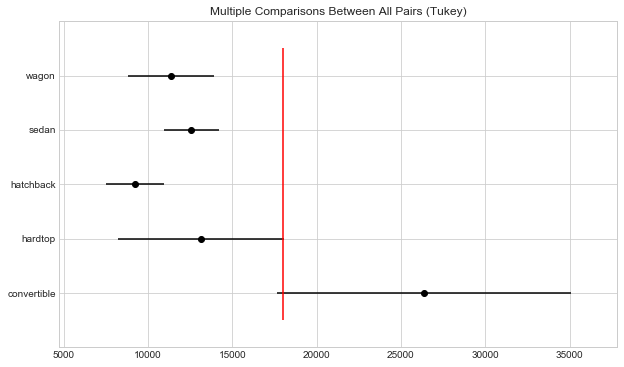

In [278]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd

tukey = pairwise_tukeyhsd(endog=data['price'],     # Data
                          groups=data['body-style'],   # Groups
                          alpha=0.05)          # Significance level

tukey.plot_simultaneous()    # Plot group confidence intervals
plt.vlines(x=18000,ymin=-0.5,ymax=4.5, color="red")

tukey.summary()   

The output of the Tukey test shows the average difference, a confidence interval as well as whether you should reject the null hypothesis for each pair of groups at the given significance level. 

In this case, the results above reveal that convertible  significantly differs from the other four  body-styles. The last column tells us that there is significant evidence to reject the null hypothesis for 5 groups.

#### Classical Method for Num of doors

C:\Users\Gandhi\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:57: FutureWarning:

reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead



(0.0, 50000.0)

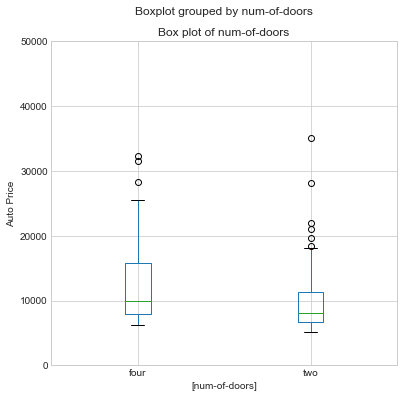

In [324]:
fig = plt.figure(figsize=(6,6)) # define plot area
ax = fig.gca() # define axis 
Automobile_df.loc[:,['price', 'num-of-doors']].boxplot(by = 'num-of-doors', ax = ax)
ax.set_title('Box plot of num-of-doors') # Give the plot a main title
ax.set_ylabel('Auto Price')# Set text for y axis
ax.set_ylim(0.0, 50000.0) # Set the limits of the y axis

#### Tukey method for num of door

In [326]:
data =  Automobile_df[['price','num-of-doors']]

In [327]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd
from statsmodels.stats.multicomp import MultiComparison

mc = MultiComparison( data['price'], data['num-of-doors'],)
result = mc.tukeyhsd()
 
print(result)
print(mc.groupsunique)

Multiple Comparison of Means - Tukey HSD,FWER=0.05
group1 group2  meandiff   lower    upper  reject
------------------------------------------------
 four   two   -1937.386 -3795.906 -78.866  True 
------------------------------------------------
['four' 'two']


#### Bootstrap methods for num of doors

In [318]:
four = Automobile_df[Automobile_df['num-of-doors'] == 'four']
two = Automobile_df[Automobile_df['num-of-doors'] == 'two']
len(four), len(two)

(95, 64)

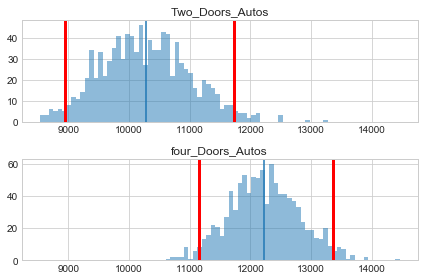

In [319]:
import pandas
n_replicas = 1000 # look at this many re-samples 

#genetate a series of re-sample means
four_bootstrap_means = pandas.Series([
    four.sample(frac=1, replace=True).price.mean()# take the mean of each sample
    for i in range(n_replicas)])

two_bootstrap_means = pandas.Series([
        two.sample(frac=1, replace=True).price.mean()# take the mean of each sample
        for i in range(n_replicas)])

plot_dists(two_bootstrap_means, four_bootstrap_means, 
           nbins=80, a_label='Two_Doors_Autos', b_label='four_Doors_Autos')

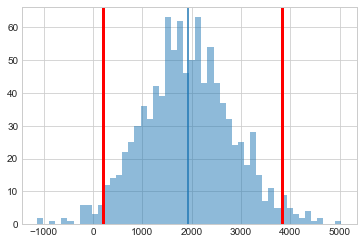

In [320]:

diffs = []
for i in range(n_replicas):
    sample = Automobile_df.sample(frac=1, replace=True)
    four_sample_mean = sample[sample['num-of-doors']=='four'].price.mean()
    two_sample_mean = sample[sample['num-of-doors']=='two'].price.mean()
    diffs.append(four_sample_mean - two_sample_mean)
diffs = pandas.Series(diffs)

plot_hist(diffs, bins =50)

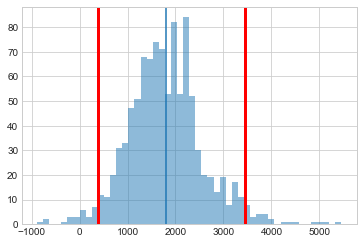

In [321]:
median_diffs = []
for i in range(n_replicas):
    sample = Automobile_df.sample(frac=1, replace=True)
    four_sample_median = sample[sample['num-of-doors']=='four'].price.median()
    two_sample_median = sample[sample['num-of-doors']=='two'].price.median()
    median_diffs.append(four_sample_median - two_sample_median)
median_diffs = pandas.Series(median_diffs)

plot_hist(median_diffs, bins =50)

In [375]:
four = Automobile_df.loc[Automobile_df.loc[:, 'num-of-doors'] == 'four', 'price']
two = Automobile_df.loc[Automobile_df.loc[:, 'num-of-doors'] == 'two', 'price']

test = t_test(four,two, 0.05)
test

DegFreedom     135.043019
Difference    1937.386020
Statistic        2.059006
PValue           0.041146
Low95CI         75.426517
High95CI      3799.345523
dtype: float64

Bayesian method on num of doors

12932.52
Mean of heights: 12932.5


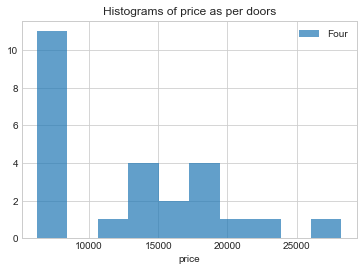

In [345]:
num_samples = 25
four_B = Automobile_df[Automobile_df['num-of-doors'] == 'four'].sample(n=num_samples)# create a sample of 25 from the original sample
two_B = Automobile_df[Automobile_df['num-of-doors'] == 'two'].sample(n=num_samples)
pyplot.title('Histograms of price as per doors')
four_B.price.hist(label='Four', bins=10, alpha=.7)
#two_B.price.hist(label='two', bins=10, alpha=.7)
pyplot.xlabel('price')
pyplot.legend()

mean_price = numpy.mean([four_B.price])
print(mean_price)
print('Mean of heights: %.1f' % mean_price)

In [347]:
def posterior(prior, like):
    post = prior * like # compute the product of the probabilities0
    return post / sum(post) # normalize the distribution to sum to unity

Mean = 12932.520, Standard deviation = 5900.835


C:\Users\Gandhi\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: RuntimeWarning:

invalid value encountered in true_divide



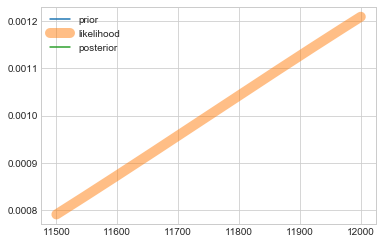

In [364]:
N = 1000
# compute the parameter space. In this case the parameter we're interested in is the mean, so we'll look for means
# in the range or heights between 60 and 75
p = numpy.linspace(11500, 12000, num=N)
# create a prior
# ou prior will look at values around the actual mean with a standard deviation of 5
# visually we can see this is fairly diffuse (less informative prior)
pp = scipy.stats.norm.pdf(p, loc=four_B.price.mean(), scale=5)
pp = pp / pp.sum() # normalize

# likelihood function
def comp_like(p, x): 
    # p: parameter space values
    # x: data
    variance = numpy.std(x)**2 # sigmasqr
    x_mean = numpy.asarray(x).mean()  # xbar
    print('Mean = %.3f, Standard deviation = %.3f' % (x_mean, numpy.std(x)))
    n = len(x)
    l = numpy.exp(-n * numpy.square(x_mean - p) / (2 * variance))
    return l / l.sum()

# compute likelihood and posterior
Four_Door = comp_like(p, four_B.price)
post_Four = posterior(pp, Four_Door)

pyplot.plot(p, pp, label='prior')
pyplot.plot(p, Four_Door, label='likelihood', alpha=.5, linewidth=10)
pyplot.plot(p, post_Four, label='posterior')
pyplot.legend()

#### Classical method for make

C:\Users\Gandhi\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:57: FutureWarning:

reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead



(0.0, 50000.0)

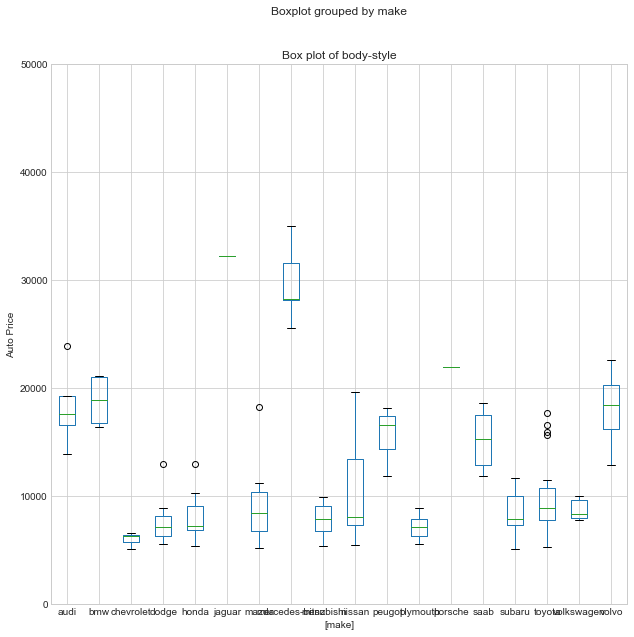

In [307]:
fig = plt.figure(figsize=(10,10)) # define plot area
ax = fig.gca() # define axis 
Automobile_df.loc[:,['price', 'make']].boxplot(by = 'make', ax = ax)
ax.set_title('Box plot of body-style') # Give the plot a main title
ax.set_ylabel('Auto Price')# Set text for y axis
ax.set_ylim(0.0, 50000.0) # Set the limits of the y axis

#### Tukey method for Make

group1,group2,meandiff,lower,upper,reject
audi,bmw,611.25,-6812.0345,8034.5345,False
audi,chevrolet,-12239.25,-20257.3136,-4221.1864,True
audi,dodge,-10456.125,-16884.8779,-4027.3721,True
audi,honda,-10061.5577,-16064.0815,-4059.0339,True
audi,jaguar,14003.75,2266.5067,25740.9933,True
audi,mazda,-9166.25,-15295.8254,-3036.6746,True
audi,mercedes-benz,11480.15,4437.804,18522.496,True
audi,mitsubishi,-10433.25,-16644.0154,-4222.4846,True
audi,nissan,-7830.5833,-13633.6317,-2027.5349,True
audi,peugot,-2487.6786,-9067.717,4092.3598,False


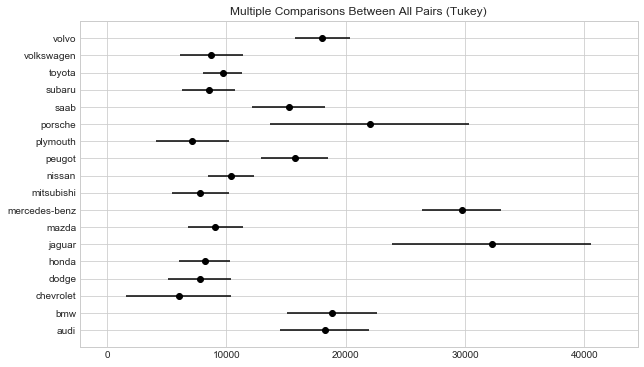

In [279]:
data =  Automobile_df[['price','make']]

from statsmodels.stats.multicomp import pairwise_tukeyhsd

tukey = pairwise_tukeyhsd(endog=data['price'],     # Data
                          groups=data['make'],   # Groups
                          alpha=0.05)          # Significance level

tukey.plot_simultaneous()    # Plot group confidence intervals
tukey.summary()   



#### Classical Method for Wheel - drive

C:\Users\Gandhi\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:57: FutureWarning:

reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead



(0.0, 50000.0)

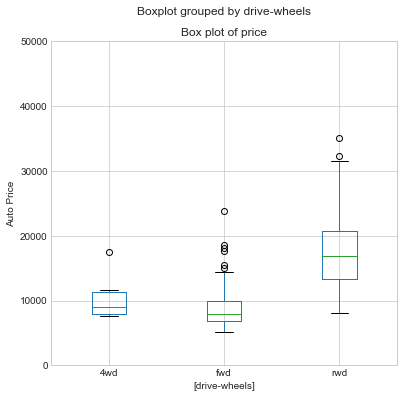

In [285]:
fig = plt.figure(figsize=(6,6)) # define plot area
ax = fig.gca() # define axis 
Automobile_df.loc[:,['price', 'drive-wheels']].boxplot(by = 'drive-wheels', ax = ax)
ax.set_title('Box plot of price') # Give the plot a main title
ax.set_ylabel('Auto Price')# Set text for y axis
ax.set_ylim(0.0, 50000.0) # Set the limits of the y axis

#### Tukey method for drive-wheel

In [286]:
data =  Automobile_df[['price','drive-wheels']]

In [287]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd
from statsmodels.stats.multicomp import MultiComparison

mc = MultiComparison( data['price'], data['drive-wheels'],)
result = mc.tukeyhsd()

 
print(result)
print(mc.groupsunique)

  Multiple Comparison of Means - Tukey HSD,FWER=0.05 
group1 group2  meandiff    lower      upper    reject
-----------------------------------------------------
 4wd    fwd   -1429.9619 -5195.8194 2335.8956  False 
 4wd    rwd   7428.2174  3495.0967  11361.3381  True 
 fwd    rwd   8858.1793  7042.7505  10673.6081  True 
-----------------------------------------------------
['4wd' 'fwd' 'rwd']


In this case, the test suggests we reject the null hypothesis for 2 pairs, with each pair including the "Rwd" category. This suggests the rwd group is likely different from the others. 

#### Bootstrap methods for drive - wheels

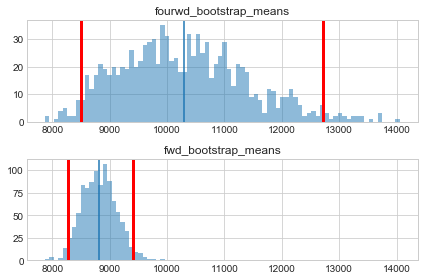

In [332]:
fourwd = Automobile_df[Automobile_df['drive-wheels'] == '4wd' ]
fwd = Automobile_df[Automobile_df['drive-wheels'] == 'fwd' ]
rwd = Automobile_df[Automobile_df['drive-wheels'] == 'rwd']

len(fourwd), len(fwd), len(rwd)

import pandas
n_replicas = 1000 # look at this many re-samples 

#genetate a series of re-sample means
fourwd_bootstrap_means = pandas.Series([
    fourwd.sample(frac=1, replace=True).price.mean()# take the mean of each sample
    for i in range(n_replicas)])

fwd_bootstrap_means = pandas.Series([
        fwd.sample(frac=1, replace=True).price.mean()# take the mean of each sample
        for i in range(n_replicas)])

rwd_bootstrap_means = pandas.Series([
        rwd.sample(frac=1, replace=True).price.mean()# take the mean of each sample
        for i in range(n_replicas)])

plot_dists(fourwd_bootstrap_means, fwd_bootstrap_means, 
           nbins=80, a_label='fourwd_bootstrap_means', b_label='fwd_bootstrap_means')



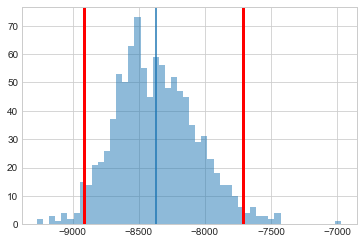

In [356]:
diffs = []
for i in range(n_replicas):
    sample = Automobile_df.sample(frac=1, replace=True)
    fwd_bootstrap_means = sample[sample['drive-wheels']=='fwd'].price.mean()
    fourwd_bootstrap_means = sample[sample['drive-wheels']=='4wd'].price.mean()
    diffs.append(fwd_bootstrap_means - rwd_bootstrap_means)
diffs = pandas.Series(diffs)

plot_hist(diffs, bins =50)

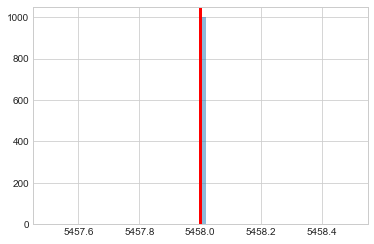

In [357]:
median_diffs = []
for i in range(n_replicas):
    sample = Automobile_df.sample(frac=1, replace=True)
    fwd_bootstrap_means = sample[sample['drive-wheels']=='fwd'].price.median()
    fourwd_bootstrap_means = sample[sample['drive-wheels']=='4wd'].price.median()
    median_diffs.append(four_sample_median - two_sample_median)
median_diffs = pandas.Series(median_diffs)

plot_hist(median_diffs, bins =50)

In [374]:
four = Automobile_df.loc[Automobile_df.loc[:, 'drive-wheels'] == '4wd', 'price']
fwd = Automobile_df.loc[Automobile_df.loc[:, 'drive-wheels'] == 'fwd', 'price']

test = t_test(four, fwd, 0.05)
test

DegFreedom       8.012692
Difference    1429.961905
Statistic        1.232987
PValue           0.220186
Low95CI      -1342.470851
High95CI      4202.394660
dtype: float64

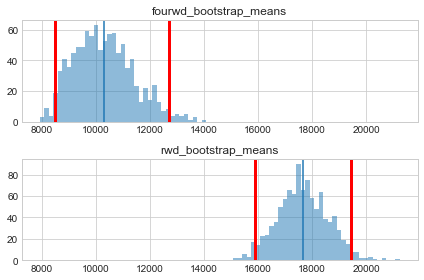

In [333]:

plot_dists(fourwd_bootstrap_means, rwd_bootstrap_means, 
           nbins=80, a_label='fourwd_bootstrap_means', b_label='rwd_bootstrap_means')

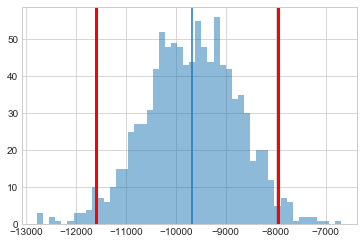

In [358]:
diffs = []
for i in range(n_replicas):
    sample = Automobile_df.sample(frac=1, replace=True)
    fourwd_bootstrap_means = sample[sample['drive-wheels']=='4wd'].price.mean()
    rwd_bootstrap_means = sample[sample['drive-wheels']=='rwd'].price.mean()
    diffs.append(fwd_bootstrap_means - rwd_bootstrap_means)
diffs = pandas.Series(diffs)

plot_hist(diffs, bins =50)

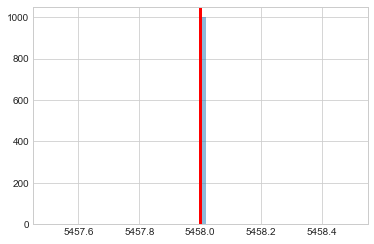

In [371]:
median_diffs = []
for i in range(n_replicas):
    sample = Automobile_df.sample(frac=1, replace=True)
    fourwd_bootstrap_means = sample[sample['drive-wheels']=='4wd'].price.median()
    rwd_bootstrap_means = sample[sample['drive-wheels']=='rwd'].price.median()
    median_diffs.append(four_sample_median - two_sample_median)
median_diffs = pandas.Series(median_diffs)

plot_hist(median_diffs, bins =50)

In [373]:
rwd = Automobile_df.loc[Automobile_df.loc[:, 'drive-wheels'] == 'rwd', 'price']
fourwd = Automobile_df.loc[Automobile_df.loc[:, 'drive-wheels'] == '4wd', 'price']

test = t_test(rwd,fourwd, 0.05)
test

DegFreedom       17.936500
Difference     7428.217391
Statistic         3.205917
PValue            0.002303
Low95CI        4287.223910
High95CI      10569.210872
dtype: float64

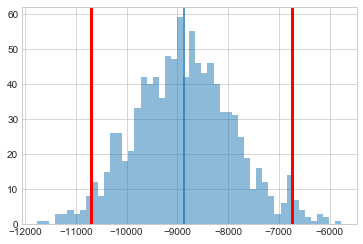

In [352]:
diffs = []
for i in range(n_replicas):
    sample = Automobile_df.sample(frac=1, replace=True)
    fwd_bootstrap_means = sample[sample['drive-wheels']=='fwd'].price.mean()
    rwd_bootstrap_means = sample[sample['drive-wheels']=='rwd'].price.mean()
    diffs.append(fwd_bootstrap_means - rwd_bootstrap_means)
diffs = pandas.Series(diffs)

plot_hist(diffs, bins =50)

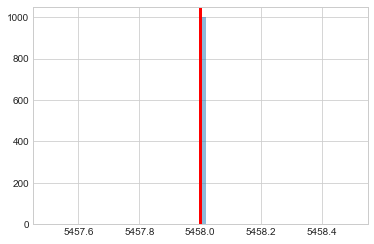

In [354]:
median_diffs = []
for i in range(n_replicas):
    sample = Automobile_df.sample(frac=1, replace=True)
    fwd_bootstrap_means = sample[sample['drive-wheels']=='fwd'].price.median()
    rwd_bootstrap_means = sample[sample['drive-wheels']=='rwd'].price.median()
    median_diffs.append(four_sample_median - two_sample_median)
median_diffs = pandas.Series(median_diffs)

plot_hist(median_diffs, bins =50)

In [372]:
rwd = Automobile_df.loc[Automobile_df.loc[:, 'drive-wheels'] == 'rwd', 'price']
fwd = Automobile_df.loc[Automobile_df.loc[:, 'drive-wheels'] == 'fwd', 'price']

test = t_test(rwd, fwd, 0.05)
test

DegFreedom    5.490245e+01
Difference    8.858179e+03
Statistic     1.143320e+01
PValue        3.965316e-22
Low95CI       6.877018e+03
High95CI      1.083934e+04
dtype: float64

### Conclusion:

- Auto Insurances must be priced to reflect the ** cars price**. Thus, the pricing of an insurance policy depends on the cost of price. Insurance should be high for the expensive cars.

- Most popular combination is Sedan and mpfi. Insurance company should focus on this combination. Keeping some atractive deal on this can grab more customers, which is the result of more profit.

- city mpg and Highway MPG have same relation with Price. As mpg increases price is decreases.

- Insurance company should charge less for four cylendar cars.